In [1]:
import numpy as np
import os
import datetime as datetime
import pandas as pd



os.system('source /home/jackalak/heartbeat/cdf38_0-dist/bin/definitions.B')
os.environ["CDF_LIB"] = '/home/jackalak/heartbeat/cdf38_0-dist/lib'
from spacepy import pycdf
from ovationpyme.ovation_prime import FluxEstimator,AverageEnergyEstimator,BinCorrector
from ovationpyme.ovation_utilities import calc_avg_solarwind
from ovationpyme.ovation_plotting import latlt2polar,polar2dial,pcolor_flux
from nasaomnireader import omnireader

import matplotlib.pyplot as plt
%matplotlib notebook

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
matplotlib.rc('font', **font)
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

import numpy as np
import pandas as pd
from datetime import timedelta


import ftplib
import os


import numpy as np
import os
import datetime as datetime
import pandas as pd





import pickle
import glob



import tensorflow as tf
from tensorflow import keras
tf.keras.backend.set_floatx(
    'float32'
)

import datetime

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import tensorflow

import numpy as np
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout
from sklearn import preprocessing


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
from os.path import isfile, join
from sys import getsizeof
import glob

from random import *

import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Input

import numpy as np
import os
import datetime as datetime
import pandas as pd

# os.system('mkdir figures2')
# os.system('mkdir figures2/energyflux')
# os.system('mkdir figures2/numberflux')
# os.system('mkdir figures2/channelnumberflux')
# os.system('mkdir figures2/numberflux_from_channels')
# os.system('mkdir figures')

os.system('source /home/jackalak/heartbeat/cdf38_0-dist/bin/definitions.B')
os.environ["CDF_LIB"] = '/home/jackalak/heartbeat/cdf38_0-dist/lib'
from spacepy import pycdf
import matplotlib.pyplot as plt
from ovationpyme.ovation_prime import FluxEstimator,AverageEnergyEstimator,BinCorrector
from ovationpyme.ovation_utilities import calc_avg_solarwind
from ovationpyme.ovation_plotting import latlt2polar,polar2dial,pcolor_flux

import numpy as np
import pandas as pd
from datetime import timedelta

from nasaomnireader import omnireader

import ftplib
import os

import os
import datetime as datetime
import pickle
import glob
import tensorflow as tf
from tensorflow import keras
import datetime

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import tensorflow

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout
from sklearn import preprocessing
import tensorflow.keras.backend as K


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
matplotlib.rc('font', **font)
from pylab import rcParams
rcParams['figure.figsize'] = 13, 10

import datetime
from os.path import isfile, join
from sys import getsizeof
from random import *

%matplotlib notebook

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Input

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nasaomnireader-0.1.0-py3.6.egg/nasaomnireader/__init__.py", line 5, in <module>
    from nasaomnireader.omnireader_config import config
ModuleNotFoundError: No module named 'nasaomnireader.omnireader_config'

Solar wind data files will be saved to /home/jackalak/.local/share/nasaomnireader


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [2]:

#https://github.com/tensorflow/tensorflow/issues/956
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import InputSpec 
from tensorflow.python.keras.utils import conv_utils

class PeriodicPadding2D(layers.Layer):

  def __init__(self, padding=1, **kwargs):
    super(PeriodicPadding2D, self).__init__(**kwargs)
    self.padding = conv_utils.normalize_tuple(padding, 1, 'padding')
    self.input_spec = InputSpec(ndim=4)

  def wrap_pad(self, input, size):
    M1 = tf.concat([input[:,:, -size:], input, input[:,:, 0:size]], 2)
    M1 = tf.concat([M1[:,0:size, :], M1, M1[:,0:size, :]], 1) #not periodic
    return M1

  def compute_output_shape(self, input_shape):
    shape = list(input_shape)
    assert len(shape) == 3  
    if shape[1] is not None:
      length = shape[1] + 2*self.padding[0]
    else:
      length = None
    return tuple([shape[0], length, length])

  def call(self, inputs): 
    return self.wrap_pad(inputs, self.padding[0])

  def get_config(self):
    config = {'padding': self.padding}
    base_config = super(PeriodicPadding2D, self).get_config()
    return dict(list(base_config.items()) + list(config.items()))

def custom_loss(y_true, y_pred):
  
    loss = K.sum( K.cast(K.greater(y_true, 0),'float64')*
               K.square(y_true-y_pred) )  / ( 
                K.sum( K.cast(K.greater(y_true, 0),'float64') ))# finds the number of y_true  > 0
    return loss



def custom_mse(y_true, y_pred):
    

    
    mse = K.sum( K.cast(K.greater(y_true, 0),'float64')*(
        K.square(y_true-y_pred)) )/params['batch_size']  
    return mse

def for_CSV_val(scaler_X, model, features, test, XX_test):


    num = test.shape[0]
    

    result_val = []

    
    for i in range(0,num):


       #################################
        #
        #ML model
        ##########################
        results = model.predict( XX_test[i:i+1,:])
        flux = results[0,:,:,0]             
        pt = i

        result_val.append( 
            flux[int((90-test['SC_AACGM_LAT'][pt])/45*128),int((test['SC_AACGM_LTIME'][pt])/24*128)] )     
    
        

    return result_val


In [3]:
def plot_model(df_results, test):
    
    subdir = 'figures2/energyflux/'

    y_val_log = np.log10(test['ELE_TOTAL_ENERGY_FLUX'])
    
    plt.figure()
    plt.title('Electron Total Energy Flux, log10 scale')    
    plt.plot(y_val_log[:],alpha=0.5)
    plt.plot(df_results[:],alpha=0.5)
    plt.legend(['val', 'result'], loc='upper left')
    plt.ylabel('log10 eV/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'1',dpi=dpi)
    
    plt.figure()
    plt.title('Electron Total Energy Flux')   
    plt.plot(10**y_val_log[:]*1.6e-6,alpha=0.5)
    plt.plot(10**df_results[:]*1.6e-6,alpha=0.5)
    plt.legend(['val', 'result'], loc='upper left')
    plt.ylabel('erg/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'2',dpi=dpi)
    start=int(y_val_log.shape[0]/2)
    plt.figure()
    plt.title('Electron Total Energy Flux, log10 scale')   
    plt.plot(y_val_log[start:2000+start],alpha=0.5)
    plt.plot(df_results[start:2000+start],alpha=0.5)
    plt.legend(['val', 'result'], loc='upper left')
    plt.ylabel('log10 eV/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'3',dpi=dpi)
    plt.figure()
    plt.title('Electron Total Energy Flux')   
    plt.plot(10**y_val_log[start:2000+start]*1.6e-6,alpha=0.5)
    plt.plot(10**df_results[start:2000+start]*1.6e-6,alpha=0.5)
    plt.legend(['val', 'result'], loc='upper left')
    plt.ylabel('erg/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'4',dpi=dpi)
    

    minr = np.min(y_val_log.values)
    maxr = np.max(y_val_log.values)
    plt.figure()
    plt.title('Histogram of Electron Total Energy Flux, log10 scale')   
    plt.hist(y_val_log.values,bins=200,alpha=0.5,range=(minr,maxr))
    plt.hist(df_results.values,bins=200,alpha=0.5,range=(minr,maxr))
    plt.legend(['val','result'], loc='upper left')
    plt.ylabel('#/bin')
    plt.xlabel('log10 eV/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'5',dpi=dpi)
    plt.figure()
    plt.title('Histogram of Electron Total Energy Flux')   
    plt.hist(10**y_val_log.values*1.6e-6,bins=100, log=True,range=(10**minr*1.6e-6,10**maxr*1.6e-6),alpha=0.5)
    plt.hist(10**df_results.values*1.6e-6,bins=100, log=True,range=(10**minr*1.6e-6,10**maxr*1.6e-6),alpha=0.5)
    plt.legend(['val', 'result'], loc='upper left')
    plt.ylabel('#/bin')
    plt.xlabel('erg/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'6',dpi=dpi)
    import matplotlib.colors as mcolors
    gamma = 0.2#[0.8, 0.5, 0.3]

    errors= y_val_log.values-df_results.values[:,0]
    plt.figure();
    plt.hist2d(test['SC_AACGM_LAT'].values, errors,
                  bins=50, norm=mcolors.PowerNorm(gamma))
    plt.title('Error density over SC_AACGM_LAT Bins')
    plt.xlabel('SC_AACGM_LAT degrees')
    plt.ylabel('log10(y_true)-log10(y_pred) eV/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'7',dpi=dpi)
    plt.figure()
    bin_total = np.zeros((200))
    bin_error_total = np.zeros((200))
    for j in range(0,y_val_log.values.shape[0]):
        i = int((test['SC_AACGM_LAT'].values[j]-45)/((90-45)/200))
        if i < 200:
            bin_total[i] = bin_total[i]+1
            bin_error_total[i] = bin_error_total[i] + np.abs(errors[j])

    avg_error_over_hist = bin_error_total/bin_total
    plt.scatter(np.linspace(45,90,num=200),avg_error_over_hist)
    plt.title('Average Validation Error over SC_AACGM_LAT Bins')
    plt.xlabel('SC_AACGM_LAT degrees')
    plt.ylabel('log10(y_true)-log10(y_pred) eV/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'8',dpi=dpi)
    bin_total = np.zeros((200))
    bin_error_total = np.zeros((200))
    for j in range(0,y_val_log.values.shape[0]):
        i = int((y_val_log[j]-minr)/((maxr-minr)/200))
        if i < 200:
            bin_total[i] = bin_total[i]+1
            bin_error_total[i] = bin_error_total[i] + np.abs(errors[j])

    avg_error_over_hist = bin_error_total/(bin_total+.00001)
    plt.figure()
    plt.scatter(np.linspace(minr,maxr,num=200),avg_error_over_hist)
    plt.title('Average Validation Error over target Bins')    
    plt.xlabel('log10(y_true) eV/cm^2/ster/s')
    plt.ylabel('log10(y_true)-log10(y_pred) eV/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'9',dpi=dpi)
    import matplotlib.colors as mcolors
    gamma = 0.2#[0.8, 0.5, 0.3]
    errors= y_val_log.values-df_results.values[:,0]

    plt.figure();
    plt.hist2d(y_val_log.values, errors,
                  bins=50, norm=mcolors.PowerNorm(gamma))
    plt.colorbar()
    plt.title('Error Density')
    plt.xlabel('log10(y_true) eV/cm^2/ster/s')
    plt.ylabel('log10(y_true)-log10(y_pred) eV/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'10',dpi=dpi)
    plt.figure();
    plt.hist2d(y_val_log.values, df_results.values[:,0],
                  bins=50, norm=mcolors.PowerNorm(gamma))
    plt.colorbar()
    plt.title('Error Density')
    plt.xlabel('log10(y_true) eV/cm^2/ster/s')
    plt.ylabel('log10(y_pred) eV/cm^2/ster/s')
    temp = np.array([7,8,9,10,11,12,13])
    plt.plot(temp,temp,color='k')
    plt.xlim([7,13])
    plt.ylim([7,13])
    plt.show()
    plt.savefig(subdir+'11',dpi=dpi)

In [4]:
def download_omni_data(t_start, t_end):

    #--------------------------------------------------------#
    #	OMNI Data - includes solar wind, and geomag params   #
    #--------------------------------------------------------#

    #get OMNI data
    omniInt = omnireader.omni_interval(t_start,t_end,'5min', cdf_or_txt = 'txt')

    #print(omniInt.cdfs[0].vars) #prints all the variables available on omni

    epochs = omniInt['Epoch'] #time array for omni 5min data
    By,Bz,AE,SymH = omniInt['BY_GSM'],omniInt['BZ_GSM'],omniInt['AE_INDEX'], omniInt['SYM_H']
    AL, AU = omniInt['AL_INDEX'],omniInt['AU_INDEX']
    vsw,psw = omniInt['flow_speed'], omniInt['Pressure']
    borovsky_reader = omnireader.borovsky(omniInt)
    borovsky = borovsky_reader()
    #newell_reader = omnireader.newell(omniInt)
    #newell = newell_reader()

    def NewellCF_calc(v,bz,by):
        # v expected in km/s
        # b's expected in nT    
        NCF = np.zeros_like(v)
        NCF.fill(np.nan)
        bt = np.sqrt(by**2 + bz**2)
        bztemp = bz
        bztemp[bz == 0] = .001
        #Caculate clock angle (theta_c = t_c)
        tc = np.arctan2(by,bztemp)
        neg_tc = bt*np.cos(tc)*bz < 0 
        tc[neg_tc] = tc[neg_tc] + np.pi
        sintc = np.abs(np.sin(tc/2.))
        NCF = (v**1.33333)*(sintc**2.66667)*(bt**0.66667)
        return NCF


    newell = NewellCF_calc(vsw, Bz, By)


    # 	proton_flux_10MeV, proton_flux_30MeV, proton_flux_60MeV = omniInt['PR-FLX_10'], omniInt['PR-FLX_30'], omniInt['PR-FLX_60']


    #calculate clock angle
    clock_angle = np.degrees(np.arctan2( By,Bz))
    clock_angle[clock_angle < 0] = clock_angle[clock_angle<0] + 360.

    #print('Got 5 minutes data')

    omniInt_1hr = omnireader.omni_interval(t_start,t_end,'hourly', cdf_or_txt = 'txt')
    F107,KP = omniInt_1hr['F10_INDEX'], omniInt_1hr['KP']
    KP = pd.DataFrame(np.repeat(KP,12,axis=0))
    F107 = pd.DataFrame(np.repeat(F107,12,axis=0))



    #put all in a dataframe and save

    dataframe = pd.DataFrame()
    dataframe['Bz'] = Bz
    dataframe['By'] = By
    dataframe['Vsw'] = vsw
    dataframe['Vx'] = omniInt['Vx']
    dataframe['Psw'] = psw
    dataframe['AE'] = AE
    dataframe['AL'] = AL
    dataframe['AU'] = AU
    dataframe['SymH'] = SymH
    dataframe['Clock Angle'] = clock_angle
    dataframe['newell'] = newell
    dataframe['borovsky'] = borovsky
    dataframe['Kp'] = KP
    dataframe['F107'] = F107
    dataframe['PC'] = omniInt['PC_N_INDEX']
    dataframe['Bx'] = omniInt['BX_GSE']
    # 	dataframe = dataframe.replace(9999.99, np.nan) #replace 9999.99 with nans ??????????????

    return dataframe

from datetime import timedelta

# In[2]:


class t_hist():
    '''
    Class which takes solar wind data and creates some time history
    for some specific time.
    
    Input:
        Data ---------- A DataFrame of solar wind data at 5 minute
                        cadence and datetime index.
        Historic_time - The number of minutes into the past you
                        would like the hisotry for. (E.g. for 1hr ago
                        you would input 60 minutes).
        window_mins --- If averaging for the time history, then this
                        input specifies the window length, in minutes,
                        centred on the historic_time specified.
    '''
    def __init__(self,data,historic_time,window_mins):
        self.data = data
        self.time = historic_time
        self.window = window_mins
        
    def avg_hist(self):
        '''
        Function which returns a historic_time value, averaged over
        the window_mins.
        
        Output:
            - A dataframe of values of the time history.
        '''
        # Check that indices are datetime
        self.is_datetime()
        
        if self.time % 60:
            raise ValueError('Please choose a historic time value '+
                             'which correspond to an integer '+
                             'number of hours!')
        
        window_s = timedelta(minutes = self.time + self.window/2.0)
        # '+5' ensures that the window is closed on the right
        window_e = timedelta(minutes = self.time + 5 -
                             self.window/2.0)
        indices = self.data.index
        
        hist = [self.data[i-window_s : i-window_e].mean().values
                for i in indices]
        
        col_label = '_'+str(self.time/60.0)[0]+'hr'
        columns = [i+col_label for i in self.data.columns]
        
        th_df = pd.DataFrame(hist, index=indices,columns=columns)
        
        return th_df[th_df.index[0]+window_s:]
    
    def instant_hist(self):
        '''
        Function which returns an instantaneous historic_time value.
        
        Output:
            - A dataframe of instantaneous values corresponding to
              historic_time minutes in the past.
        '''
        # Check that indices are datetime
        self.is_datetime()
        
        if self.time % 5:
            raise ValueError('Please choose a historic time value '+
                             'which correspond to a multiple of 5 '+
                             'minutes!')
            
        t_offset = timedelta(minutes=self.time)
        indices = self.data.index
        

        hist = [self.data.loc[i-t_offset].values
                 for i in self.data.index
                 if i >= indices[0]+t_offset]
        
        if self.time < 60:
            if self.time >= 10:
                col_label = '_'+str(self.time)[0:2]+'min'
            else:
                col_label = '_'+str(self.time)[0]+'min'
        else:
            col_label = '_'+str(self.time/60.0)[0]+'hr_I'
        columns = [i+col_label for i in self.data.columns]
        return pd.DataFrame(hist, index=indices[int(self.time/5):],
                            columns=columns)
    
    def is_datetime(self):
        dt_type = pd.core.indexes.datetimes.DatetimeIndex
        if type(self.data.index) != dt_type:
            raise ValueError('Dataframe index is not '+
                             'in the correct datetime '+
                             'format')
        else:
            pass


# In[3]:

def cleaning_data(data,safe_cols=[],sigma_val=4):
    '''
    Function which removes data which is 'sigma_val' stdevs from
    the mean.

    Note: 4 sigma encompasses ~99.994% of the data.
          ~1 real piece of 5 min data is removed for
          every 55 days of such data (assuming Gaussian).

    Inputs:
    sigma_val - (float) number of standard deviations from the
                mean to consider as the limit of 'good' data.
    safe_cols - Columns in the data which one might like to
                keep without any changes (i.e., if there are
                no null values in the initial dataset etc.).

    Returns:
     - Cleaned solar wind data dataframe.
     - Dataframe of 'bad' solar wind data.
    '''

#   Initialising data and empty lists
    sw_df = data
    cleaned_cols = []
    trash_data = []
#   Looping through dataframe columns and removing 'bad' values
    for i in sw_df.columns:
        if i not in safe_cols:
            std = sw_df[i].std()
            mean = sw_df[i].mean()

            cleaned = sw_df[i][sw_df[i]<mean+std*sigma_val]
            trash = sw_df[i][sw_df[i]>=mean+std*sigma_val]

            cleaned_cols.append(cleaned)
            trash_data.append(trash)
        else:
            cleaned_cols.append(sw_df[i])
            trash_data.append([np.nan])
#   Initialising empty dataframes and appending data
    sw_c_df = pd.DataFrame()
    trash_df = pd.DataFrame()

    for i in range(len(sw_df.columns)):
#         sw_c_df[sw_df.columns[i]] = cleaned_cols[i]
#         sw_c_df = sw_c_df
        sw_c_df_temp = pd.DataFrame(cleaned_cols[i],
                                 columns=[sw_df.columns[i]])
        sw_c_df = pd.concat([sw_c_df,sw_c_df_temp], axis=1)

        trash_df_temp = pd.DataFrame(trash_data[i],
                                     columns=[sw_df.columns[i]])
        trash_df = pd.concat([trash_df,trash_df_temp], axis=1)

#   Checking if the trash data contains non-'bad' data.
    check_trash(trash_df)
    return (sw_c_df, trash_df)

#################################

def sw_interp(data,method='linear'):
    '''
    Function which interpolates NaN values in the cleaned
    data dataframe.

    See Pandas documentation for other methods.

    Input:
    method - method of interpolation.

    Return:
     - Cleaned, interpolated data.
    '''
    return data.interpolate(method=method)

#################################

def check_trash(trash_data):
    '''
    Function which checks to see if all the removed data
    is the 'bad' data fill value.

    Returns:
     - String detailing which parameters have had real
       removed from them.
    '''
    for i in trash_data.columns:
        if (trash_data[i].mean() <
            trash_data[i].max()):
            print('Some real data has been removed from: ',i)
        else:
            pass

# In[4]:

def time_history(data,auto=True):
    '''
    Function which calculates time history information
    given an input dataframe.
    
    Averages are centred on the respective time-history
    specified.
    
    Input:
    data - a Pandas DataFrame containing 5 minute cadence
           data.
           MUST HAVE DATETIME INDEX.
    auto - Whether or not to automatically clean the data.
           If not True, then the cleaning_data() and
           sw_interp() functions must be called individually
           and the results of sw_interp() should be the data
           fed to this function, time_history(). Set to false
           to retrieve the non-interpolated data and the trash
           data.
    
    Output:
    A concatenated DataFrame containing
        - the original data
        - t-6hrs (1hr avg)
        - t-5hrs (1hr avg)
        - t-3hrs (30min avg)
        - t-1hrs (30min avg)
        - t-45min (instant)
        - t-30min (instant)
        - t-15min (instant)
        - t-10min (instant)
        - t-5min (instant)
    '''
    if auto is True:
        c_data,t_data = cleaning_data(data,sigma_val=4,
                                  safe_cols=[None])
        c_i_data = sw_interp(c_data,method='linear')
        
        data = c_i_data
    else:
        pass
    return pd.concat((data,
                      t_hist(data,360,60).avg_hist(),
                      t_hist(data,300,60).avg_hist(),
                      t_hist(data,180,30).avg_hist(),
                      t_hist(data,60,30).avg_hist(),
                      t_hist(data,45,0).instant_hist(),
                      t_hist(data,30,0).instant_hist(),
                      t_hist(data,15,0).instant_hist(),
                      t_hist(data,10,0).instant_hist(),
                      t_hist(data,5,0).instant_hist()),axis=1)

import ftplib
import os

def _is_ftp_dir(ftp_handle, name, guess_by_extension=True):
    """ simply determines if an item listed on the ftp server is a valid directory or not """

    # if the name has a "." in the fourth to last position, its probably a file extension
    # this is MUCH faster than trying to set every file to a working directory, and will work 99% of time.
    if guess_by_extension is True:
        if name[-4] == '.':
            return False

    original_cwd = ftp_handle.pwd()     # remember the current working directory
    try:
        ftp_handle.cwd(name)            # try to set directory to new name
        ftp_handle.cwd(original_cwd)    # set it back to what it was
        return True
    except:
        return False


def _make_parent_dir(fpath):
    """ ensures the parent directory of a filepath exists """
    dirname = os.path.dirname(fpath)
    while not os.path.exists(dirname):
        try:
            os.mkdir(dirname)
            print("created {0}".format(dirname))
        except:
            _make_parent_dir(dirname)


def _download_ftp_file(ftp_handle, name, dest, overwrite,datetime_start,datetime_end):
    """ downloads a single file from an ftp server """
    _make_parent_dir(dest)
    
    if (name[-7:-1]!='SHA1SU'): #ignore SHA1SUM files
        month = int(name[-15:-13])
        day = int(name[-13:-11])
        year = int(name[-19:-15])
        base = datetime.datetime(year, month, day)
        if (datetime_start <= base <= datetime_end):

            if not os.path.exists(dest) or overwrite is True:
                with open(dest, 'wb') as f:
                    ftp_handle.retrbinary("RETR {0}".format(name), f.write)
                print("downloaded: {0}".format(dest))
            else:
                print("already exists: {0}".format(dest))


def _mirror_ftp_dir(ftp_handle, name, overwrite, guess_by_extension,datetime_start,datetime_end):
    """ replicates a directory on an ftp server recursively """
    for item in ftp_handle.nlst(name):
        if _is_ftp_dir(ftp_handle, item):
            _mirror_ftp_dir(ftp_handle, item, overwrite, guess_by_extension,datetime_start,datetime_end)
        else:
            _download_ftp_file(ftp_handle, item, item, overwrite,datetime_start,datetime_end)


def download_ftp_tree(ftp_handle, path, destination, datetime_start,datetime_end, overwrite=False, guess_by_extension=True):
    """
    Downloads an entire directory tree from an ftp server to the local destination

    :param ftp_handle: an authenticated ftplib.FTP instance
    :param path: the folder on the ftp server to download
    :param destination: the local directory to store the copied folder
    :param overwrite: set to True to force re-download of all files, even if they appear to exist already
    :param guess_by_extension: It takes a while to explicitly check if every item is a directory or a file.
        if this flag is set to True, it will assume any file ending with a three character extension ".???" is
        a file and not a directory. Set to False if some folders may have a "." in their names -4th position.
    """
    os.chdir(destination)
    _mirror_ftp_dir(ftp_handle, path, overwrite, guess_by_extension,datetime_start,datetime_end)
    
def  get_data(datetime_start,datetime_end,sc_id):

    years = {6:[1987], 7:[1987],8:[1987],9:[1988]
             ,12:[2000,2001,2002], 13:[2000,2001,2002,2003,2004,2005,2006,2007],14:[2000,2001,2002,2003,2004,2005],
             15:[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009],
             16:[2010,2011,2012,2013,2014,2015], #year 2003-2009 is not accessible on site
             17:[2009,2010,2011,2012,2013,2014,2015],
             18:[2010,2011,2012,2013,2014,2015],#2009 not accessible
            } 
    
#     if !(years[sc_id].any() != datetime_start.year):
#         print('bad sc_id year combination')
#         exit()
    
    dmsp_feature_list = ['ELE_AVG_ENERGY','ELE_AVG_ENERGY_STD','ELE_TOTAL_ENERGY_FLUX','ELE_TOTAL_ENERGY_FLUX_STD',
                         'SC_AACGM_LAT',  'SC_AACGM_LON','SC_AACGM_LTIME',] 
    #                     'ION_AVG_ENERGY','ION_AVG_ENERGY_STD','ION_TOTAL_ENERGY_FLUX','ION_TOTAL_ENERGY_FLUX_STD','SC_GEOCENTRIC_LAT','SC_GEOCENTRIC_LON','SC_GEOCENTRIC_R']
    dmsp_feature_list_19 =['ELE_COUNTS_BKG','ELE_COUNTS_OBS','ELE_DIFF_ENERGY_FLUX','ELE_DIFF_ENERGY_FLUX_STD',
                      'CHANNEL_ENERGIES','ELE_COUNTS_BKG','ELE_COUNTS_OBS',]
    #                  'ELE_GEOMETRIC','ION_COUNTS_BKG','ION_COUNTS_OBS','ION_DIFF_ENERGY_FLUX','ION_DIFF_ENERGY_FLUX_STD','ION_GEOMETRIC',
    #                  'SC_ECI','SC_ECI_LABEL']

    import glob
    all_sc_df = pd.DataFrame()
    count = 0
    for ii in [sc_id]:
        sc_df = pd.DataFrame()
        print(ii)
        directory = 'pub/data/dmsp/dmspf'
        if ii <10:
            directory = directory + '0'
        directory = directory + str(ii) + '/ssj/precipitating-electrons-ions'
        for year in [datetime_start.year]:
            print(year)
            
            from ftplib import FTP_TLS
            ftp=FTP_TLS('cdaweb.gsfc.nasa.gov')
            ftp.login()
            ftp.dir()
            download_ftp_tree(ftp, directory, '.',datetime_start,datetime_end)
            
            file_list=glob.glob(directory + '/'+str(year)+'/*')
            
            
            for file in file_list:
                print(file)
                #try:

                count = count+1
                month = int(file[-15:-13])
                day = int(file[-13:-11])
                base = datetime.datetime(year, month, day)

                if (datetime_start <= base <= datetime_end):
                    indices = np.array([base + datetime.timedelta(seconds=iii) for iii in range(0,60*24*60)])
                    df = pd.DataFrame(data=indices,columns=['index'])
                    cdf = pycdf.CDF(file)
                    count = count+1
                    for feature in dmsp_feature_list:
                        df[feature] = cdf[feature]

                    ch_energies = cdf['CHANNEL_ENERGIES']
                    #print(ch_energies[:])
                    ch_energies = np.flip((ch_energies[:]))
                    ele_geom = np.flip( cdf['ELE_GEOMETRIC'][:])
                                       
                    obs_m_bkg = np.flip(cdf['ELE_COUNTS_OBS'][:,:]- cdf['ELE_COUNTS_BKG'][:,:],axis=1)
                    temp_jN = np.zeros((60*24*60,19))
                    for kk in range(0,19):
                        temp_jN[:,kk] =( obs_m_bkg[:,kk]
                             )/          ele_geom[kk]
                        
                    df['ELE_TOTAL_COUNTS'] = temp_jN[:,0]*(ch_energies[1]-ch_energies[0])
                    + temp_jN[:,18]*(ch_energies[18]-ch_energies[17])
                    for i in range(1,18):
                        df['ELE_TOTAL_COUNTS'] = df['ELE_TOTAL_COUNTS']  +     temp_jN[:,i]*(ch_energies[i+1]-ch_energies[i-1])/2.

                    for i in range(0,19):
                        name = 'ELE_COUNT_'+str(i+1)
                        df[name]=temp_jN[:,i]
                    for i in range(0,19):
                        name = 'ELE_diff_'+str(i+1)
                        df[name]=cdf['ELE_DIFF_ENERGY_FLUX'][:,i]

                    df = df.set_index('index')
                    df.index = pd.to_datetime(df.index)

                    print('df',df.shape)#, df)
                    #Create a time window
                    df = df[df['ELE_TOTAL_ENERGY_FLUX'] > 0].dropna(subset=['ELE_TOTAL_ENERGY_FLUX'])

                     #Create a time window
                    sTimeIMF = datetime.datetime(year,month,day)
                    eTimeIMF = sTimeIMF + datetime.timedelta(hours = 24)

                    df_omni_5min = download_omni_data(sTimeIMF- datetime.timedelta(hours = 6),
                                                 eTimeIMF+ datetime.timedelta(hours = 6))
                    print('df_omni_5min',df_omni_5min.shape)#, df_omni_5min)
                    indices = np.array([sTimeIMF- datetime.timedelta(hours = 6)+ datetime.timedelta(minutes=5*iii) for iii in range(0,df_omni_5min.shape[0])])
                    print('indices',indices.shape)#, indices)

                    df_omni_5min = pd.DataFrame(data=df_omni_5min.values,columns=df_omni_5min.columns, index=indices)
                    print('df_omni_5min',df_omni_5min.shape)#, df_omni_5min)


                    # call time_history to clean up omnireader data        
                    df_omni_5min_cleaned = time_history(df_omni_5min)
                    print('df_omni_5min_cleaned',df_omni_5min_cleaned.shape)#,, df_omni_5min_cleaned)
                    df_omni_1min_cleaned = pd.DataFrame(np.repeat(df_omni_5min_cleaned.values,5*60,axis=0))
                    print('df_omni_5min_cleaned',df_omni_5min_cleaned.shape)#,, df_omni_5min_cleaned)

        #             #create the indices
                    indices = []
                    for index in df_omni_5min_cleaned.index:
                        for jj in range(0,60*5):
                            indices.append(index+ datetime.timedelta(seconds=jj))
                    print('indices',len(indices))#, indices)

                    df_omni_1min_cleaned = pd.DataFrame(data=df_omni_1min_cleaned.values,columns=df_omni_5min_cleaned.columns,
                                                        index=indices)    
                    print('df_omni_5min_cleaned',df_omni_5min_cleaned.shape)#, df_omni_5min_cleaned)

                    intersection_indices = df_omni_1min_cleaned.index.intersection(df.index)
                    print('intersection_indices',intersection_indices.shape)#,, intersection_indices)

                    df = df.loc[intersection_indices]
                    print('df',df.shape)#, df)
                    df_omni_1min_cleaned = df_omni_1min_cleaned.loc[intersection_indices]
                    print('df_omni_5min_cleaned',df_omni_5min_cleaned.shape)#, df_omni_5min_cleaned)

                    #combine Omni and DMSP data
                    for feature in df_omni_1min_cleaned.columns:
                        df[feature] = df_omni_1min_cleaned[feature]  

                    sc_df = pd.concat([sc_df,df])
                    print('sc_df',sc_df.shape)#, sc_df)
#                 except Exception as e: 
#                     print('Error')
#                     print(e)
#                     print(file)


        

            sc_df['SC_ID']= ii

            #filescname = "./all_sc_df_1-sec_2010-" + str(ii) + ".pkl"
            #pickling_on = open(filescname,"wb")
            #pickle.dump(sc_df, pickling_on,protocol=4)

            all_sc_df = pd.concat([all_sc_df,sc_df])   
            #print(i, 'all_sc_df',all_sc_df.shape, all_sc_df)

    test=all_sc_df
    test['datetime']=test.index
    test=test.sort_values(by=['datetime'])
    test = test.set_index('datetime')

    # get rid of ones near equatoer
    test=test[np.abs(test['SC_AACGM_LAT'])>45]
    # swap by for southern hemisphere
    test.loc[test['SC_AACGM_LAT']<0 , 'By'] = -test.loc[test['SC_AACGM_LAT']<0 , 'By']
    #combine southern with northern hemisphere data
    test['SC_AACGM_LAT']=np.abs(test['SC_AACGM_LAT'])

    test['cos_SC_AACGM_LTIME']=np.cos(test['SC_AACGM_LTIME']*2*3.14159/24)
    test['sin_SC_AACGM_LTIME']=np.sin(test['SC_AACGM_LTIME']*2*3.14159/24)

    doy_loop = test.index.day
    ut_loop = test.index.hour*3600 + test.index.minute*60 + test.index.second
    test['sin_doy']= np.sin(2*np.pi*doy_loop/365.)
    test['cos_doy'] = np.cos(2*np.pi*doy_loop/365.)
    test['sin_ut'] = np.sin(2*np.pi*ut_loop/86400.)
    test['cos_ut'] = np.cos(2*np.pi*ut_loop/86400.)

    del doy_loop,ut_loop
    cdf
    return test    


dpi=200



In [5]:
def plot_model_multiple(df_results,model_names, y_val_log):
    
    
    
    num = len(df_results)
    names = ['Validation']
    for i in range(0,num):
        names.append(model_names[i])
    y_val_log = np.log10(10**(y_val_log)*3.14159)

    for i in range(0,num):
        df_results[i] = np.log10(10**(df_results[i])*3.14159)
    plt.figure()
    plt.plot(y_val_log[:],alpha = 0.5)
    for i in range(0,num):
        plt.plot(df_results[i],alpha = 0.5)
    plt.legend(names, loc='upper left')
    plt.title('Log10 Total Energy Flux [eV/cm^s/ster/s]')

    plt.show()


    plt.figure()
    plt.plot(10**y_val_log[:]*1.6e-6,alpha = 0.5)
    for i in range(0,num):
        plt.plot(10**df_results[i]*1.6e-6,alpha = 0.5)
    plt.legend(names, loc='upper left')
    plt.show()

    plt.figure()
    plt.hist(10**y_val_log.values*1.6e-6,bins=200, range=(10**6*1.6e-6,10**14*1.6e-6), log=True,alpha = 0.5)
    for i in range(0,num):
        plt.hist(10**df_results[i].values*1.6e-6,bins=200,range=(10**6*1.6e-6,10**14*1.6e-6), log=True,alpha = 0.5)
    plt.legend(names, loc='upper left')
    plt.show()



    plt.figure()
    plt.hist(y_val_log.values,bins=200,range=(6,14),alpha = 0.5)
    for i in range(0,num):  
        plt.hist(df_results[i].values,bins=200,range=(6,14),alpha = 0.5)
    plt.legend(names, loc='upper left')
    plt.show()



    plt.figure()
    plt.hist(y_val_log.values,bins=200,range=(6,14))
    for k in range(0,num):
        plt.hist(df_results[k].values,bins=200,range=(6,14),alpha = 0.5)
    plt.legend(names, loc='upper left')
    plt.ylim([0,2000])
    plt.show()



    plt.figure();
    for k in range(0,num):     
        errors= y_val_log.values-df_results[k].values[:,0]
        plt.scatter(y_val_log.values,errors,s=1,alpha = 0.5)
    plt.title('Errors over target Bins')
    plt.legend(model_names, loc='upper left')                      
    plt.show()

    plt.figure();
    for k in range(0,num):
        errors= y_val_log.values-df_results[k].values[:,0]     
        bin_total = np.zeros((200))
        bin_error_total = np.zeros((200))
        for j in range(0,y_val_log.values.shape[0]):
            i = int((y_val_log[j]-6)/((14-6)/200))
            if i < 200:
                bin_total[i] = bin_total[i]+1
                bin_error_total[i] = bin_error_total[i] + np.abs(errors[j])
        avg_error_over_hist = bin_error_total/(bin_total+.00001)
        plt.scatter(np.linspace(6,14,num=200),avg_error_over_hist,alpha = 0.5)
    plt.title('Average Validation Error over target Bins')    
    plt.legend(model_names, loc='upper left')
    plt.ylim([0,2.6])
    plt.show()

    for k in range(0,num):  
        plt.figure();

        errors= y_val_log.values-df_results[k].values[:,0]
        plt.hist2d(y_val_log.values,errors,bins=200)
        plt.title('Errors over target Bins'+model_names[k])
        plt.show()
        
    plt.figure();
    for k in range(0,num):      
        errors= y_val_log.values-df_results[k].values[:,0]     
        plt.scatter(df_val['SC_AACGM_LAT'].values,errors,s=1,alpha = 0.5)
    plt.legend(model_names, loc='upper left')                      
    plt.title('Errors over SC_AACGM_LAT Bins')
    plt.show()

    plt.figure();
    for k in range(0,num):
        errors= y_val_log.values-df_results[k].values[:,0]     
        bin_total = np.zeros((200))
        bin_error_total = np.zeros((200))
        for j in range(0,y_val_log.values.shape[0]):
            i = int((df_val['SC_AACGM_LAT'].values[j]-45)/((90-45)/200))
            if i < 200:
                bin_total[i] = bin_total[i]+1
                bin_error_total[i] = bin_error_total[i] + np.abs(errors[j])
        avg_error_over_hist = bin_error_total/bin_total
        plt.scatter(np.linspace(45,90,num=200),avg_error_over_hist,alpha = 0.5)
    plt.title('Average Validation Error over SC_AACGM_LAT Bins')
    plt.legend(model_names, loc='upper left')
    plt.ylim([0,1.2])
    plt.show()

In [6]:

os.system('source /home/jackalak/Downloads/cdf37_1-dist/bin/definitions.B')
os.environ["CDF_LIB"] = '/home/jackalak/Downloads/cdf37_1-dist/lib'
from spacepy import pycdf

from ovationpyme.ovation_prime import FluxEstimator,AverageEnergyEstimator,BinCorrector
from ovationpyme.ovation_utilities import calc_avg_solarwind
from ovationpyme.ovation_plotting import latlt2polar,polar2dial,pcolor_flux
    
def plot_model_multiple_polar(models,model_names, scalars, model_input_keys, dims, model_pipeline,df_val_inputs):
    for pt in range(0,df_val_inputs.shape[0]):
        dt =   df_val_inputs.index[pt]#  datetime.datetime( df_val_inputs.index[pt].date().timetuple().tm_year , df_val_inputs.index[pt].date().timetuple().tm_mon,
                                 # df_val_inputs.index[pt].date().timetuple().tm_mday, 
                                 # df_val_inputs.index[pt].date().timetuple().tm_hour, )
#                                   df_val_inputs.index[pt].date().timetuple().tm_min) #year,month,day,hour,minute)
        print(pt,df_val_inputs.index[pt])
        print(dt)      
        
        num = len(models)

        subplotlist=[]
        fig= plt.figure(figsize=(12,16))
        subplotlist.append(plt.subplot2grid((6,2), (0,0), rowspan=1,colspan=1,polar=True) )
        subplotlist.append( plt.subplot2grid((6,2), (0, 1), rowspan=1,colspan=1,polar=True) ) 
        subplotlist.append( plt.subplot2grid((6,2), (1,0), rowspan=1,colspan=1,polar=True))
        subplotlist.append( plt.subplot2grid((6,2), (1, 1), rowspan=1,colspan=1,polar=True))
        subplotlist.append( plt.subplot2grid((6,2), (2,0), rowspan=1,colspan=1,polar=True))
        subplotlist.append( plt.subplot2grid((6,2), (2, 1), rowspan=1,colspan=1,polar=True))
        subplotlist.append( plt.subplot2grid((6,2), (3,0), rowspan=1,colspan=1,polar=True))
        subplotlist.append( plt.subplot2grid((6,2), (3, 1), rowspan=1,colspan=1,polar=True))    
        subplotlist.append( plt.subplot2grid((6,2), (4,0), rowspan=1,colspan=1,polar=True))
        subplotlist.append( plt.subplot2grid((6,2), (4, 1), rowspan=1,colspan=1,polar=True))   
        subplotlist.append( plt.subplot2grid((6,2), (5,0), rowspan=1,colspan=1,polar=True))
        subplotlist.append( plt.subplot2grid((6,2), (5, 1), rowspan=1,colspan=1,polar=True))
        mark= ['s', 'o', 'D', 'v']

#         %matplotlib inline
#         plt.ioff()

        pcolor_kwargs = {'cmap':'gnuplot','vmin':7.5,'vmax':13}

        for i in range(0,num):
            print(model_names[i])
            model = models[i]
            X_test=df_val_inputs[model_input_keys[i]][pt:pt+1]

            
            if (dims[i] == 2):
                
                X_test= scalars[i].transform(X_test.values)
                results = model.predict(X_test)
                mlatgridN = np.linspace(90,45,num=128)
                mltgridN =  np.linspace(0,24,num=128)   
                flux = 10**(results[0,:,:,0])*1.60218e-12*3.14159

                ax=subplotlist[i+1]
                mappableN = pcolor_flux(ax,mlatgridN,mltgridN,np.log10(flux/1.60218e-12),'N',**pcolor_kwargs)

                ax.set_title(model_names[i],fontweight="bold", fontsize='medium',pad=10)


                ax.set_theta_zero_location('S')
                theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
                theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
                ax.set_thetagrids(theta_label_values,labels=theta_labels)

                r_label_values = 90.-np.array([80.,70.,60.,50.])
                r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
                ax.set_rgrids(r_label_values,labels=r_labels)
                ax.set_rlim([0.,45.])

#                 ax.scatter(np.linspace(90,45,128),np.log10(flux[:,int(23/24*128)]/1.60218e-12), marker=mark[3])
            else:
                
                
                mlatgridN = np.linspace(90,45,num=128)
                mltgridN =  np.linspace(0,24,num=128)          

                #################################
                #
                #ML model
                ##########################
                model_input = np.zeros((128,128,len(model_input_keys[i])))
                flux = np.zeros((mlatgridN.shape[0], mltgridN.shape[0]))


                for j in range(0,mlatgridN.shape[0]):
                    for k in range(0,mltgridN.shape[0]):        
                        #calc cos and sin
                        rads = mltgridN[k]*15*3.14159/180.
                        model_input[j,k,:]=X_test.values
                        if ( (model_pipeline[i] ==1) 
                            or (len(model_input_keys[i])==33 or len(model_input_keys[i])==59)  
                           ) :
                            model_input[j,k,7]=np.cos(rads)
                            model_input[j,k,6]=np.sin(rads)
                            model_input[j,k,0]=mlatgridN[j]
                        elif  ( len(model_input_keys[i])== 72)  :
                            model_input[j,k,72-6]=np.cos(rads)
                            model_input[j,k,72-5]=np.sin(rads)
                            model_input[j,k,0]=mlatgridN[j] 
                        else: 
                            model_input[j,k,142]=np.cos(rads)
                            model_input[j,k,143]=np.sin(rads)
                            model_input[j,k,0]=mlatgridN[j]          
                shaped = np.reshape(model_input,(128*128,len(model_input_keys[i])))
                X_val_scaled = scalars[i].transform(shaped)
                #get auroral region and flux
                flux = np.log10(10**(np.reshape(model.predict(X_val_scaled),(128,128)))*3.14159)
        
                ax=subplotlist[i+1]
                mappableN = pcolor_flux(ax,mlatgridN,mltgridN,flux,'N',**pcolor_kwargs)

                ax.set_title(model_names[i],fontweight="bold", fontsize='medium',pad=10)


                ax.set_theta_zero_location('S')
                theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
                theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
                ax.set_thetagrids(theta_label_values,labels=theta_labels)

                r_label_values = 90.-np.array([80.,70.,60.,50.])
                r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
                ax.set_rgrids(r_label_values,labels=r_labels)
                ax.set_rlim([0.,45.])

#                 ax.scatter(np.linspace(90,45,128),np.log10(flux[:,int(23/24*128)]/1.60218e-12), marker=mark[3])



#         range1=np.min(np.min([-df_val['AL'].values,df_val['AE'].values,df_val['AU'].values]))
#         range2=np.max(np.max([-df_val['AL'].values,df_val['AE'].values,df_val['AU'].values]))


        ###########################3
        # Ovation128
        ########################

        auroral_types = ['diff','mono','wave','ions']
        # axS = f.add_subplot(122,projection='polar')
        for jj in range(0,3):
            atype = auroral_types[jj]
            jtype ="energy"
            bincorrect = True
            combine_hemispheres = True
            dtstr = dt.strftime('%Y%m%d %H:%M')
            if jtype=='average energy':
                estimator = AverageEnergyEstimator(atype)
                get_precip_for_time = estimator.get_eavg_for_time
            else:
                estimator = FluxEstimator(atype,jtype)
                get_precip_for_time = estimator.get_flux_for_time


            tflux_kwargs = {'combine_hemispheres':combine_hemispheres,
                            'return_dF':True}
            fluxtupleN = get_precip_for_time(dt,hemi='N',**tflux_kwargs)
            mlatgridN,mltgridN,fluxgridN,newell_coupling = fluxtupleN
            fluxtupleS = get_precip_for_time(dt,hemi='S',**tflux_kwargs)
            mlatgridS,mltgridS,fluxgridS,newell_coupling = fluxtupleS

            if bincorrect:
                bcN = BinCorrector(mlatgridN,mltgridN)
                fluxgridN = bcN.fix(fluxgridN)
                bcS = BinCorrector(mlatgridS,mltgridS)
                fluxgridS = bcS.fix(fluxgridS)
                print("Correction Applied")

            if jj== 0:
                fluxgridN_sum = fluxgridN
                fluxgridS_sum = fluxgridS
            else:
                fluxgridN_sum = fluxgridN_sum+fluxgridN
                fluxgridS_sum = fluxgridN_sum+fluxgridS

        mappableN = pcolor_flux( subplotlist[0],mlatgridN,mltgridN,np.log10(fluxgridN_sum/1.60218e-12),'N',**pcolor_kwargs)

        subplotlist[0].set_title('OVATION Pyme',pad =10,fontweight="bold", fontsize='medium')


        subplotlist[0].set_theta_zero_location('S')
        theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
        theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
        subplotlist[0].set_thetagrids(theta_label_values,labels=theta_labels,fontsize='medium', )

        r_label_values = 90.-np.array([80.,70.,60.,50.])
        r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
        subplotlist[0].set_rgrids(r_label_values,labels=r_labels)
        subplotlist[0].set_rlim([0.,45.])

#         subplotlist[0].scatter(np.ones((20))*23/24*2*3.14159 ,                   np.linspace(0,40,20)      )     

        plt.colorbar(mappableN,ax=subplotlist[i+2],label='Total Energy Flux [erg/cm^s/s]')        

        fig.tight_layout() 
#         fig.set_title('Log10 Predicted Electron Precipitation Energy Flux')
        plt.show()
    


In [7]:

    
def plot_model_multiple_polar_no_log_scale(models,model_names, scalars, model_input_keys, dims, model_pipeline,df_val_inputs):
    for pt in range(0,df_val_inputs.shape[0]):
        dt = df_val_inputs.index[pt]
        print(dt)    
        num = len(models)

        subplotlist=[]
        fig= plt.figure(figsize=(12,16))
        subplotlist.append(plt.subplot2grid((6,2), (0,0), rowspan=1,colspan=1,polar=True) )
        subplotlist.append( plt.subplot2grid((6,2), (0, 1), rowspan=1,colspan=1,polar=True) ) 
        subplotlist.append( plt.subplot2grid((6,2), (1,0), rowspan=1,colspan=1,polar=True))
        subplotlist.append( plt.subplot2grid((6,2), (1, 1), rowspan=1,colspan=1,polar=True))
        subplotlist.append( plt.subplot2grid((6,2), (2,0), rowspan=1,colspan=1,polar=True))
        subplotlist.append( plt.subplot2grid((6,2), (2, 1), rowspan=1,colspan=1,polar=True))
        subplotlist.append( plt.subplot2grid((6,2), (3,0), rowspan=1,colspan=1,polar=True))
        subplotlist.append( plt.subplot2grid((6,2), (3, 1), rowspan=1,colspan=1,polar=True))    
        subplotlist.append( plt.subplot2grid((6,2), (4,0), rowspan=1,colspan=1,polar=True))
        subplotlist.append( plt.subplot2grid((6,2), (4, 1), rowspan=1,colspan=1,polar=True))   
        subplotlist.append( plt.subplot2grid((6,2), (5,0), rowspan=1,colspan=1,polar=True))
        subplotlist.append( plt.subplot2grid((6,2), (5, 1), rowspan=1,colspan=1,polar=True))

        mark= ['s', 'o', 'D', 'v']

#         %matplotlib inline
#         plt.ioff()

        pcolor_kwargs = {'cmap':'gnuplot','vmin': 10**7.5*1.60218e-12,'vmax': 10**12.5*1.60218e-12}

        for i in range(0,num):
            print(model_names[i])
            model = models[i]
            X_test=df_val_inputs[model_input_keys[i]][pt:pt+1]

            
            if (dims[i] == 2):
                
                X_test= scalars[i].transform(X_test.values)
                results = model.predict(X_test)
                mlatgridN = np.linspace(90,45,num=128)
                mltgridN =  np.linspace(0,24,num=128)   
                flux = 10**(results[0,:,:,0])*1.60218e-12*3.14159

                ax=subplotlist[i+1]
                mappableN = pcolor_flux(ax,mlatgridN,mltgridN,flux,'N',**pcolor_kwargs)

                ax.set_title(model_names[i],fontweight="bold", fontsize='medium',pad=10)


                ax.set_theta_zero_location('S')
                theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
                theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
                ax.set_thetagrids(theta_label_values,labels=theta_labels)

                r_label_values = 90.-np.array([80.,70.,60.,50.])
                r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
                ax.set_rgrids(r_label_values,labels=r_labels)
                ax.set_rlim([0.,45.])

#                 ax.scatter(np.linspace(90,45,128),np.log10(flux[:,int(23/24*128)]/1.60218e-12), marker=mark[3])
            else:
                
                
                mlatgridN = np.linspace(90,45,num=128)
                mltgridN =  np.linspace(0,24,num=128)          

                #################################
                #
                #ML model
                ##########################
                model_input = np.zeros((128,128,len(model_input_keys[i])))
                flux = np.zeros((mlatgridN.shape[0], mltgridN.shape[0]))


                for j in range(0,mlatgridN.shape[0]):
                    for k in range(0,mltgridN.shape[0]):        
                        #calc cos and sin
                        rads = mltgridN[k]*15*3.14159/180.
                        model_input[j,k,:]=X_test.values
                        if ( (model_pipeline[i] ==1) 
                            or (len(model_input_keys[i])==33 or len(model_input_keys[i])==59)  
                           ) :
                            model_input[j,k,7]=np.cos(rads)
                            model_input[j,k,6]=np.sin(rads)
                            model_input[j,k,0]=mlatgridN[j]
                        elif  ( len(model_input_keys[i])== 72)  :
                            model_input[j,k,72-6]=np.cos(rads)
                            model_input[j,k,72-5]=np.sin(rads)
                            model_input[j,k,0]=mlatgridN[j] 
                        else: 
                            model_input[j,k,142]=np.cos(rads)
                            model_input[j,k,143]=np.sin(rads)
                            model_input[j,k,0]=mlatgridN[j]          
                shaped = np.reshape(model_input,(128*128,len(model_input_keys[i])))
                X_val_scaled = scalars[i].transform(shaped)
                #get auroral region and flux
                flux = (10**(np.reshape(model.predict(X_val_scaled),(128,128)))*3.14159*1.60218e-12)

                ax=subplotlist[i+1]
                mappableN = pcolor_flux(ax,mlatgridN,mltgridN,flux,'N',**pcolor_kwargs)

                ax.set_title(model_names[i],fontweight="bold", fontsize='medium',pad=10)


                ax.set_theta_zero_location('S')
                theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
                theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
                ax.set_thetagrids(theta_label_values,labels=theta_labels)

                r_label_values = 90.-np.array([80.,70.,60.,50.])
                r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
                ax.set_rgrids(r_label_values,labels=r_labels)
                ax.set_rlim([0.,45.])

#                 ax.scatter(np.linspace(90,45,128),np.log10(flux[:,int(23/24*128)]/1.60218e-12), marker=mark[3])



#         range1=np.min(np.min([-df_val['AL'].values,df_val['AE'].values,df_val['AU'].values]))
#         range2=np.max(np.max([-df_val['AL'].values,df_val['AE'].values,df_val['AU'].values]))


        ###########################3
        # Ovation128
        ########################

        auroral_types = ['diff','mono','wave','ions']
        # axS = f.add_subplot(122,projection='polar')
        for jj in range(0,3):
            atype = auroral_types[jj]
            jtype ="energy"
            bincorrect = True
            combine_hemispheres = True
            dtstr = dt.strftime('%Y%m%d %H:%M')
            if jtype=='average energy':
                estimator = AverageEnergyEstimator(atype)
                get_precip_for_time = estimator.get_eavg_for_time
            else:
                estimator = FluxEstimator(atype,jtype)
                get_precip_for_time = estimator.get_flux_for_time


            tflux_kwargs = {'combine_hemispheres':combine_hemispheres,
                            'return_dF':True}
            fluxtupleN = get_precip_for_time(dt,hemi='N',**tflux_kwargs)
            mlatgridN,mltgridN,fluxgridN,newell_coupling = fluxtupleN
            fluxtupleS = get_precip_for_time(dt,hemi='S',**tflux_kwargs)
            mlatgridS,mltgridS,fluxgridS,newell_coupling = fluxtupleS

            if bincorrect:
                bcN = BinCorrector(mlatgridN,mltgridN)
                fluxgridN = bcN.fix(fluxgridN)
                bcS = BinCorrector(mlatgridS,mltgridS)
                fluxgridS = bcS.fix(fluxgridS)
                print("Correction Applied")

            if jj== 0:
                fluxgridN_sum = fluxgridN
                fluxgridS_sum = fluxgridS
            else:
                fluxgridN_sum = fluxgridN_sum+fluxgridN
                fluxgridS_sum = fluxgridN_sum+fluxgridS

        mappableN = pcolor_flux( subplotlist[0],mlatgridN,mltgridN,fluxgridN_sum,'N',**pcolor_kwargs)

        subplotlist[0].set_title('OVATION Pyme',pad =10,fontweight="bold", fontsize='medium')


        subplotlist[0].set_theta_zero_location('S')
        theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
        theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
        subplotlist[0].set_thetagrids(theta_label_values,labels=theta_labels,fontsize='medium', )

        r_label_values = 90.-np.array([80.,70.,60.,50.])
        r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
        subplotlist[0].set_rgrids(r_label_values,labels=r_labels)
        subplotlist[0].set_rlim([0.,45.])

#         subplotlist[0].scatter(np.ones((20))*23/24*2*3.14159 ,                   np.linspace(0,40,20)      )     

        plt.colorbar(mappableN,ax=subplotlist[i+2],label='Total Energy Flux [erg/cm^s/s]')        

        fig.tight_layout() 
#         fig.set_title('Log10 Predicted Electron Precipitation Energy Flux')
        plt.show()

In [8]:
df_val = get_data( datetime.datetime(2010, 3, 18),datetime.datetime(2010, 3, 18),16)
df_val=df_val.dropna()


16
2010
lrwxrwxrwx   1 rcandey  cdaweb         18 Sep 26  2012 000_readme.txt -> pub/000_readme.txt
lrwxrwxrwx   1 rcandey  cdaweb         18 May  5  2017 000test -> pub/000_readme.txt
lrwxrwxrwx   1 rcandey  cdaweb         17 Oct  5  2018 datasets.json -> pub/datasets.json
lrwxrwxrwx   1 tkovalic cdaweb         24 Sep 25  2012 filelist.gz -> pub/catalogs/filelist.gz
lrwxrwxrwx   1 tkovalic cdaweb         30 Sep 25  2012 filelist.patch.gz -> pub/catalogs/filelist.patch.gz
lrwxrwxrwx   1 tkovalic cdaweb         21 Sep 25  2012 ls-lR.gz -> pub/catalogs/ls-lR.gz
lrwxrwxrwx   1 tkovalic cdaweb         27 Sep 25  2012 ls-lR.patch.gz -> pub/catalogs/ls-lR.patch.gz
drwxrwxr-x  11 tkovalic cdaweb         15 May 11 10:08 pub
-rwxr-xr--   1 tkovalic cdaweb       1457 Sep 27  2019 robots.txt
already exists: pub/data/dmsp/dmspf16/ssj/precipitating-electrons-ions/2010/dmsp-f16_ssj_precipitating-electrons-ions_20100318_v1.1.2.cdf
pub/data/dmsp/dmspf16/ssj/precipitating-electrons-ions/2010/dmsp-f16_s

df (86400, 46)
(105120,)
Created interval between 2010-03-17 and 2010-03-19, cadence 5min, start index 21816, end index 22248
(8760,)
Created interval between 2010-03-17 and 2010-03-19, cadence hourly, start index 1818, end index 1854
Applying transform Hourly Kp*10 -> Kp to omni hourly variable KP
df_omni_5min (432, 16)
indices (432,)
df_omni_5min (432, 16)
Some real data has been removed from:  AU
df_omni_5min_cleaned (432, 160)
df_omni_5min_cleaned (432, 160)
indices 129600
df_omni_5min_cleaned (432, 160)
intersection_indices (63258,)
df (63258, 46)
df_omni_5min_cleaned (432, 160)
sc_df (63258, 206)
pub/data/dmsp/dmspf16/ssj/precipitating-electrons-ions/2010/dmsp-f16_ssj_precipitating-electrons-ions_20100911_v1.1.2.cdf
pub/data/dmsp/dmspf16/ssj/precipitating-electrons-ions/2010/dmsp-f16_ssj_precipitating-electrons-ions_20100417_v1.1.2.cdf
pub/data/dmsp/dmspf16/ssj/precipitating-electrons-ions/2010/dmsp-f16_ssj_precipitating-electrons-ions_20100802_v1.1.2.cdf
pub/data/dmsp/dmspf16/ss

In [9]:
models = []
model_names = []
scalars = []
model_input_keys = []
dims = [1,1,1,2,2]
model_pipeline = [1,1,1,1,1]

In [10]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input

def custom_loss(y_true, y_pred):
    

    loss = K.mean( 
        2.5*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,11.5),'float32')*K.cast(K.less_equal(y_pred,11.5),'float32') +
        5*(y_true-y_pred)*(y_true-y_pred) 
        *K.cast(K.greater(y_true,12.),'float32')*K.cast(K.less_equal(y_pred,12.0),'float32') +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.5),'float32')*K.cast(K.less_equal(y_pred,12.5),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,12.75),'float32')*K.cast(K.less_equal(y_pred,12.75),'float32')  
        +
        10*(y_true-y_pred)*(y_true-y_pred)
        *K.cast(K.greater(y_true,13.),'float32')*K.cast(K.less_equal(y_pred,13.),'float32')  
    )             
                 
            
    loss =  loss+K.mean((y_true-y_pred)*(y_true-y_pred))

    return loss

In [11]:
y_val = df_val['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)


y_val[y_val == 0] = 0.0001
y_val_log = np.log10(y_val.copy(deep=True))

models = []
model_names = []
scalars = []
model_input_keys = []
dims = [1,1,1,2,2]
model_pipeline = [1,1,1,1,1]

filename = 'Scalar_X_pipeline1_148.pkl'
scaler_X = pickle.load( open(filename,"rb"))

keys = ['SC_AACGM_LAT', 'SC_ID', 'sin_ut', 'cos_ut', 'sin_doy', 'cos_doy', 
        'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME', 'F107', 'Bz', 'By', 'Bx', 'AE', 'AL',
        'AU', 'SymH', 'PC', 'Vsw', 'Vx', 'Psw', 'borovsky', 'newell', 'F107_6hr', 'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AE_6hr', 'AL_6hr', 'AU_6hr', 'SymH_6hr', 'PC_6hr', 'Vsw_6hr', 'Vx_6hr', 'Psw_6hr', 'borovsky_6hr', 'newell_6hr', 'F107_5hr', 'Bz_5hr', 'By_5hr', 'Bx_5hr', 'AE_5hr', 'AL_5hr', 'AU_5hr', 'SymH_5hr', 'PC_5hr', 'Vsw_5hr', 'Vx_5hr', 'Psw_5hr', 'borovsky_5hr', 'newell_5hr', 'F107_3hr', 'Bz_3hr', 'By_3hr', 'Bx_3hr', 'AE_3hr', 'AL_3hr', 'AU_3hr', 'SymH_3hr', 'PC_3hr', 'Vsw_3hr', 'Vx_3hr', 'Psw_3hr', 'borovsky_3hr', 'newell_3hr', 'F107_1hr', 'Bz_1hr', 'By_1hr', 'Bx_1hr', 'AE_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr', 'PC_1hr', 'Vsw_1hr', 'Vx_1hr', 'Psw_1hr', 'borovsky_1hr', 'newell_1hr', 'F107_45min', 'Bz_45min', 'By_45min', 'Bx_45min', 'AE_45min', 'AL_45min', 'AU_45min', 'SymH_45min', 'PC_45min', 'Vsw_45min', 'Vx_45min', 'Psw_45min', 'borovsky_45min', 'newell_45min', 'F107_30min', 'Bz_30min', 'By_30min', 'Bx_30min', 'AE_30min', 'AL_30min', 'AU_30min', 'SymH_30min', 'PC_30min', 'Vsw_30min', 'Vx_30min', 'Psw_30min', 'borovsky_30min', 'newell_30min', 'F107_15min', 'Bz_15min', 'By_15min', 'Bx_15min', 'AE_15min', 'AL_15min', 'AU_15min', 'SymH_15min', 'PC_15min', 'Vsw_15min', 'Vx_15min', 'Psw_15min', 'borovsky_15min', 'newell_15min', 'F107_10min', 'Bz_10min', 'By_10min', 'Bx_10min', 'AE_10min', 'AL_10min', 'AU_10min', 'SymH_10min', 'PC_10min', 'Vsw_10min', 'Vx_10min', 'Psw_10min', 'borovsky_10min', 'newell_10min', 'F107_5min', 'Bz_5min', 'By_5min', 'Bx_5min', 'AE_5min', 'AL_5min', 'AU_5min', 'SymH_5min', 'PC_5min', 'Vsw_5min', 'Vx_5min', 'Psw_5min', 'borovsky_5min', 'newell_5min']

X_val_scaled = scaler_X.transform(df_val[keys].values)
X_test = np.array(X_val_scaled, dtype=np.float32)

filename='old_pipeline1_148'
model = tensorflow.keras.models.load_model(filename)

models.append(model)
model_names.append(filename)
scalars.append(scaler_X)
model_input_keys.append(keys)

X_test = np.array(X_val_scaled, dtype=np.float32)
results = model.predict(X_test)
df_results = pd.DataFrame(data=results, index = df_val.index)
old_pipeline1_148 = df_results



filename = 'Scalar_X_pipeline1_148.pkl'
scaler_X = pickle.load( open(filename,"rb"))
X_val_scaled = scaler_X.transform(df_val[keys].values)
X_test = np.array(X_val_scaled, dtype=np.float32)

filename='tail_loss'
model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss})

X_test = np.array(X_val_scaled, dtype=np.float32)
results = model.predict(X_test)
df_results = pd.DataFrame(data=results, index = df_val.index)
tail_loss_new_pipeline2_15sec = df_results


models.append(model)
model_names.append(filename)
scalars.append(scaler_X)
model_input_keys.append(keys)

filename = 'Scalar_X_pipeline1_148.pkl'
scaler_X = pickle.load( open(filename,"rb"))

keys = ['SC_AACGM_LAT', 'SC_ID', 'sin_ut', 'cos_ut', 'sin_doy', 'cos_doy', 
        'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME', 'F107', 'Bz', 'By', 'Bx', 'AE', 'AL',
        'AU', 'SymH', 'PC', 'Vsw', 'Vx', 'Psw', 'borovsky', 'newell', 'F107_6hr', 'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AE_6hr', 'AL_6hr', 'AU_6hr', 'SymH_6hr', 'PC_6hr', 'Vsw_6hr', 'Vx_6hr', 'Psw_6hr', 'borovsky_6hr', 'newell_6hr', 'F107_5hr', 'Bz_5hr', 'By_5hr', 'Bx_5hr', 'AE_5hr', 'AL_5hr', 'AU_5hr', 'SymH_5hr', 'PC_5hr', 'Vsw_5hr', 'Vx_5hr', 'Psw_5hr', 'borovsky_5hr', 'newell_5hr', 'F107_3hr', 'Bz_3hr', 'By_3hr', 'Bx_3hr', 'AE_3hr', 'AL_3hr', 'AU_3hr', 'SymH_3hr', 'PC_3hr', 'Vsw_3hr', 'Vx_3hr', 'Psw_3hr', 'borovsky_3hr', 'newell_3hr', 'F107_1hr', 'Bz_1hr', 'By_1hr', 'Bx_1hr', 'AE_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr', 'PC_1hr', 'Vsw_1hr', 'Vx_1hr', 'Psw_1hr', 'borovsky_1hr', 'newell_1hr', 'F107_45min', 'Bz_45min', 'By_45min', 'Bx_45min', 'AE_45min', 'AL_45min', 'AU_45min', 'SymH_45min', 'PC_45min', 'Vsw_45min', 'Vx_45min', 'Psw_45min', 'borovsky_45min', 'newell_45min', 'F107_30min', 'Bz_30min', 'By_30min', 'Bx_30min', 'AE_30min', 'AL_30min', 'AU_30min', 'SymH_30min', 'PC_30min', 'Vsw_30min', 'Vx_30min', 'Psw_30min', 'borovsky_30min', 'newell_30min', 'F107_15min', 'Bz_15min', 'By_15min', 'Bx_15min', 'AE_15min', 'AL_15min', 'AU_15min', 'SymH_15min', 'PC_15min', 'Vsw_15min', 'Vx_15min', 'Psw_15min', 'borovsky_15min', 'newell_15min', 'F107_10min', 'Bz_10min', 'By_10min', 'Bx_10min', 'AE_10min', 'AL_10min', 'AU_10min', 'SymH_10min', 'PC_10min', 'Vsw_10min', 'Vx_10min', 'Psw_10min', 'borovsky_10min', 'newell_10min', 'F107_5min', 'Bz_5min', 'By_5min', 'Bx_5min', 'AE_5min', 'AL_5min', 'AU_5min', 'SymH_5min', 'PC_5min', 'Vsw_5min', 'Vx_5min', 'Psw_5min', 'borovsky_5min', 'newell_5min']

X_val_scaled = scaler_X.transform(df_val[keys].values)

filename='model_3_dist_tail_50bins'
model = tensorflow.keras.models.load_model(filename)

X_test = np.array(X_val_scaled, dtype=np.float32)
results = model.predict(X_test)
df_results = pd.DataFrame(data=results, index = df_val.index)
model_3_dist_tail_50bins = df_results


models.append(model)
model_names.append(filename)
scalars.append(scaler_X)
model_input_keys.append(keys)



def custom_loss(y_true, y_pred):
  
    loss = K.sum( K.cast(K.greater(y_true, 0),'float64')*
               K.square(y_true-y_pred) )  / ( 
                K.sum( K.cast(K.greater(y_true, 0),'float64') ))# finds the number of y_true  > 0
    return loss



def custom_mse(y_true, y_pred):
    

    
    mse = K.sum( K.cast(K.greater(y_true, 0),'float64')*(
        K.square(y_true-y_pred)) )/params['batch_size']  
    return mse

def for_CSV_val(scaler_X, model, features, test, XX_test):


    num = test.shape[0]
    

    result_val = []

    
    for i in range(0,num):


       #################################
        #
        #ML model
        ##########################
        results = model.predict( XX_test[i:i+1,:])
        flux = results[0,:,:,0]             
        pt = i

        result_val.append( flux[int((90-test['SC_AACGM_LAT'][pt])/45*128),int((test['SC_AACGM_LTIME'][pt])/24*128)] )     
    
        

    return result_val


filename = 'Scalar_X_pipeline1_145.pkl'
scaler_X = pickle.load( open(filename,"rb"))
keys=['SC_ID', 'sin_ut','cos_ut', 'sin_doy', 'cos_doy', 
                     'F107', 'Bz', 'By', 'Bx', 'AE', 'AL', 'AU', 'SymH', 'PC', 'Vsw', 'Vx', 'Psw', 
    'borovsky', 'newell', 'F107_6hr', 'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AE_6hr', 'AL_6hr', 'AU_6hr',
    'SymH_6hr', 'PC_6hr', 'Vsw_6hr', 'Vx_6hr', 'Psw_6hr', 'borovsky_6hr', 'newell_6hr', 'F107_5hr',
    'Bz_5hr', 'By_5hr', 'Bx_5hr', 'AE_5hr', 'AL_5hr', 'AU_5hr', 'SymH_5hr', 'PC_5hr', 'Vsw_5hr', 'Vx_5hr',
    'Psw_5hr', 'borovsky_5hr', 'newell_5hr', 'F107_3hr', 'Bz_3hr', 'By_3hr', 'Bx_3hr', 'AE_3hr', 'AL_3hr',
    'AU_3hr', 'SymH_3hr', 'PC_3hr', 'Vsw_3hr', 'Vx_3hr', 'Psw_3hr', 'borovsky_3hr', 'newell_3hr', 'F107_1hr',
    'Bz_1hr', 'By_1hr', 'Bx_1hr', 'AE_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr', 'PC_1hr', 'Vsw_1hr', 'Vx_1hr',
    'Psw_1hr', 'borovsky_1hr', 'newell_1hr', 'F107_45min', 'Bz_45min', 'By_45min', 'Bx_45min', 'AE_45min', 
    'AL_45min', 'AU_45min', 'SymH_45min', 'PC_45min', 'Vsw_45min', 'Vx_45min', 'Psw_45min', 'borovsky_45min', 
    'newell_45min', 'F107_30min', 'Bz_30min', 'By_30min', 'Bx_30min', 'AE_30min', 'AL_30min', 'AU_30min', 
    'SymH_30min', 'PC_30min', 'Vsw_30min', 'Vx_30min', 'Psw_30min', 'borovsky_30min', 'newell_30min', 
    'F107_15min', 'Bz_15min', 'By_15min', 'Bx_15min', 'AE_15min', 'AL_15min', 'AU_15min', 'SymH_15min', 
    'PC_15min', 'Vsw_15min', 'Vx_15min', 'Psw_15min', 'borovsky_15min', 'newell_15min', 'F107_10min', 
    'Bz_10min', 'By_10min', 'Bx_10min', 'AE_10min', 'AL_10min', 'AU_10min', 'SymH_10min', 'PC_10min', 
    'Vsw_10min', 'Vx_10min', 'Psw_10min', 'borovsky_10min', 'newell_10min', 'F107_5min', 'Bz_5min', 'By_5min', 
    'Bx_5min', 'AE_5min', 'AL_5min', 'AU_5min', 'SymH_5min', 'PC_5min', 'Vsw_5min', 'Vx_5min', 'Psw_5min', 
    'borovsky_5min', 'newell_5min'
]
X_val = (df_val[keys])

X_val_scaled = scaler_X.transform(df_val[keys].values)


filename='mse_pipeline1_33_2D_128x128_periodic_dropout_float64'
model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss, 'custom_mse': custom_mse})


models.append(model)
model_names.append('Conv2D_transpose_128x128')
scalars.append(scaler_X)
model_input_keys.append(keys)

result_val = for_CSV_val(scaler_X, model, keys, df_val, X_val_scaled)
print(np.average((y_val_log-(np.array(result_val)))**2))
Conv2D_transpose_128x128 = pd.DataFrame(data=result_val, index = df_val.index)



filename = 'Scalar_X_pipeline1_145.pkl'
scaler_X = pickle.load( open(filename,"rb"))
keys=['SC_ID', 'sin_ut','cos_ut', 'sin_doy', 'cos_doy', 
                     'F107', 'Bz', 'By', 'Bx', 'AE', 'AL', 'AU', 'SymH', 'PC', 'Vsw', 'Vx', 'Psw', 
    'borovsky', 'newell', 'F107_6hr', 'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AE_6hr', 'AL_6hr', 'AU_6hr',
    'SymH_6hr', 'PC_6hr', 'Vsw_6hr', 'Vx_6hr', 'Psw_6hr', 'borovsky_6hr', 'newell_6hr', 'F107_5hr',
    'Bz_5hr', 'By_5hr', 'Bx_5hr', 'AE_5hr', 'AL_5hr', 'AU_5hr', 'SymH_5hr', 'PC_5hr', 'Vsw_5hr', 'Vx_5hr',
    'Psw_5hr', 'borovsky_5hr', 'newell_5hr', 'F107_3hr', 'Bz_3hr', 'By_3hr', 'Bx_3hr', 'AE_3hr', 'AL_3hr',
    'AU_3hr', 'SymH_3hr', 'PC_3hr', 'Vsw_3hr', 'Vx_3hr', 'Psw_3hr', 'borovsky_3hr', 'newell_3hr', 'F107_1hr',
    'Bz_1hr', 'By_1hr', 'Bx_1hr', 'AE_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr', 'PC_1hr', 'Vsw_1hr', 'Vx_1hr',
    'Psw_1hr', 'borovsky_1hr', 'newell_1hr', 'F107_45min', 'Bz_45min', 'By_45min', 'Bx_45min', 'AE_45min', 
    'AL_45min', 'AU_45min', 'SymH_45min', 'PC_45min', 'Vsw_45min', 'Vx_45min', 'Psw_45min', 'borovsky_45min', 
    'newell_45min', 'F107_30min', 'Bz_30min', 'By_30min', 'Bx_30min', 'AE_30min', 'AL_30min', 'AU_30min', 
    'SymH_30min', 'PC_30min', 'Vsw_30min', 'Vx_30min', 'Psw_30min', 'borovsky_30min', 'newell_30min', 
    'F107_15min', 'Bz_15min', 'By_15min', 'Bx_15min', 'AE_15min', 'AL_15min', 'AU_15min', 'SymH_15min', 
    'PC_15min', 'Vsw_15min', 'Vx_15min', 'Psw_15min', 'borovsky_15min', 'newell_15min', 'F107_10min', 
    'Bz_10min', 'By_10min', 'Bx_10min', 'AE_10min', 'AL_10min', 'AU_10min', 'SymH_10min', 'PC_10min', 
    'Vsw_10min', 'Vx_10min', 'Psw_10min', 'borovsky_10min', 'newell_10min', 'F107_5min', 'Bz_5min', 'By_5min', 
    'Bx_5min', 'AE_5min', 'AL_5min', 'AU_5min', 'SymH_5min', 'PC_5min', 'Vsw_5min', 'Vx_5min', 'Psw_5min', 
    'borovsky_5min', 'newell_5min'
]
X_val = (df_val[keys])
X_val_scaled = scaler_X.transform(df_val[keys].values)



filename='mse_new_pipeline_145_2D_128x128_periodic_dropout_tailloss_pipline1_2'
model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss, 'custom_mse': custom_mse})



models.append(model)
model_names.append('Conv2D_transpose_128x128_tail_loss')
scalars.append(scaler_X)
model_input_keys.append(keys)

result_val = for_CSV_val(scaler_X, model, keys, df_val, X_val_scaled)
print(np.average((y_val_log-(np.array(result_val)))**2))
Conv2D_transpose_128x128_tail_loss = pd.DataFrame(data=result_val, index = df_val.index)

All_results = [old_pipeline1_148,tail_loss_new_pipeline2_15sec,model_3_dist_tail_50bins,Conv2D_transpose_128x128,Conv2D_transpose_128x128_tail_loss]

0.568574215444578
0.658943312575548


In [12]:
model_names = ['baseline',
 'custom tail loss',
 'Distribution loss',
 'Conv2D_trans',
 'Conv2D_trans & T.L']


2010-03-18 01:32:20


<IPython.core.display.Javascript object>


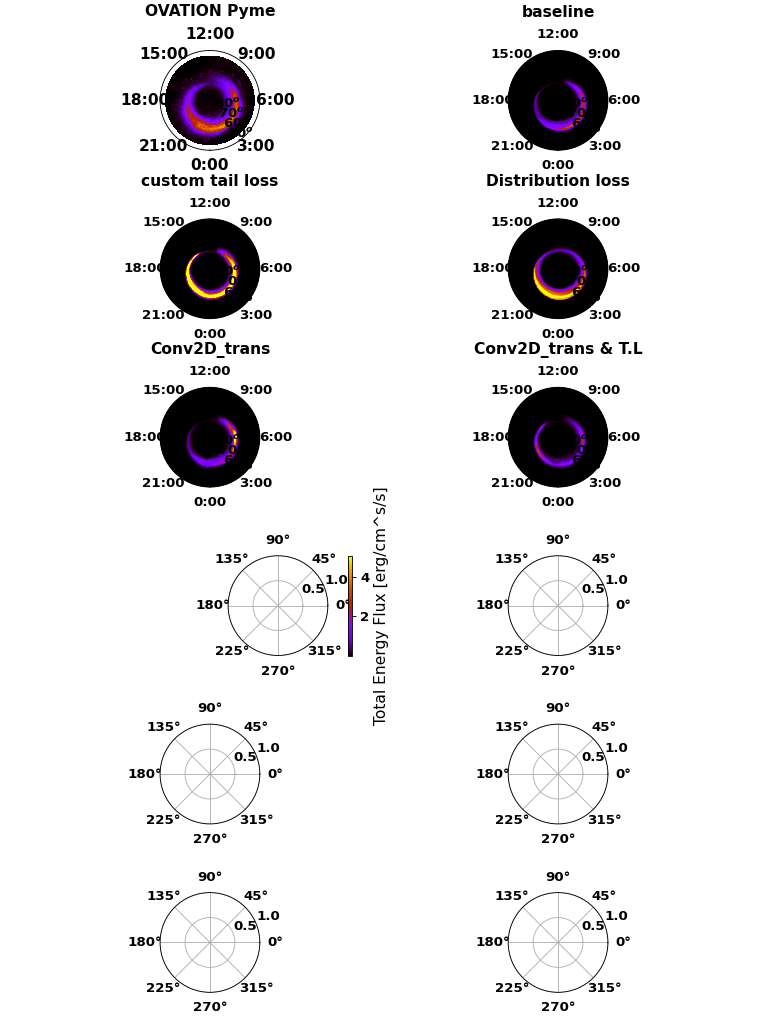

baseline


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


custom tail loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Distribution loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-

Conv2D_trans
Conv2D_trans & T.L
Correction Applied
Correction Applied


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Correction Applied


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


2010-03-18 03:52:43


<IPython.core.display.Javascript object>


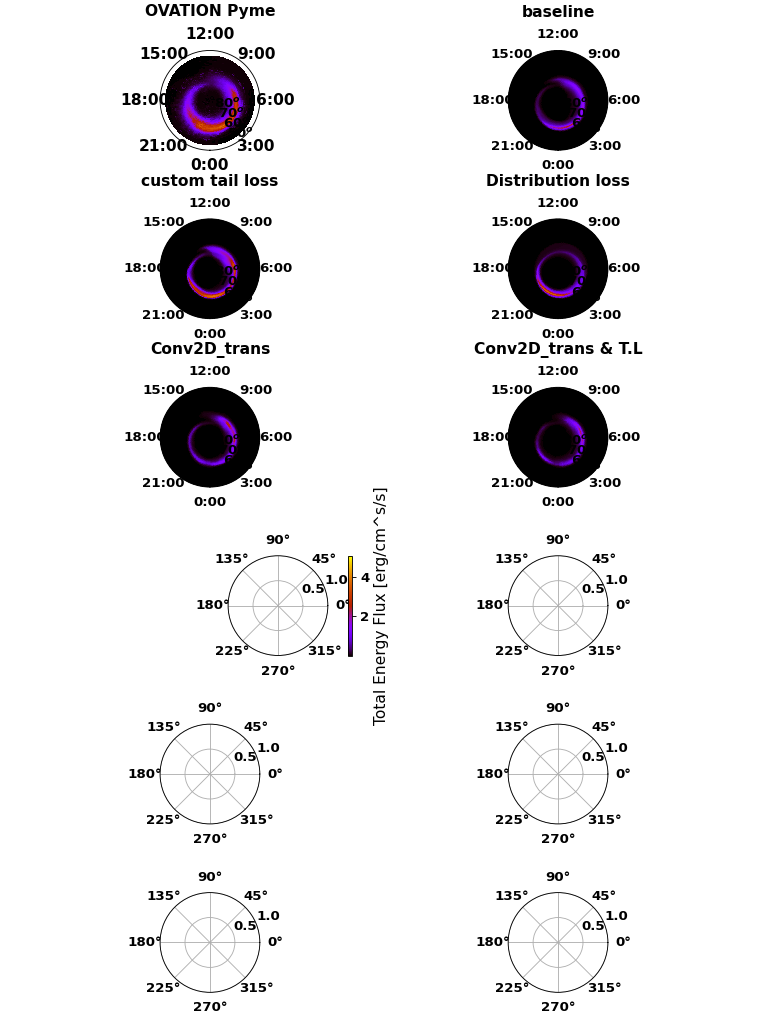

baseline


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


custom tail loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Distribution loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-

Conv2D_trans
Conv2D_trans & T.L
Correction Applied
Correction Applied
Correction Applied
2010-03-18 06:23:46


<IPython.core.display.Javascript object>


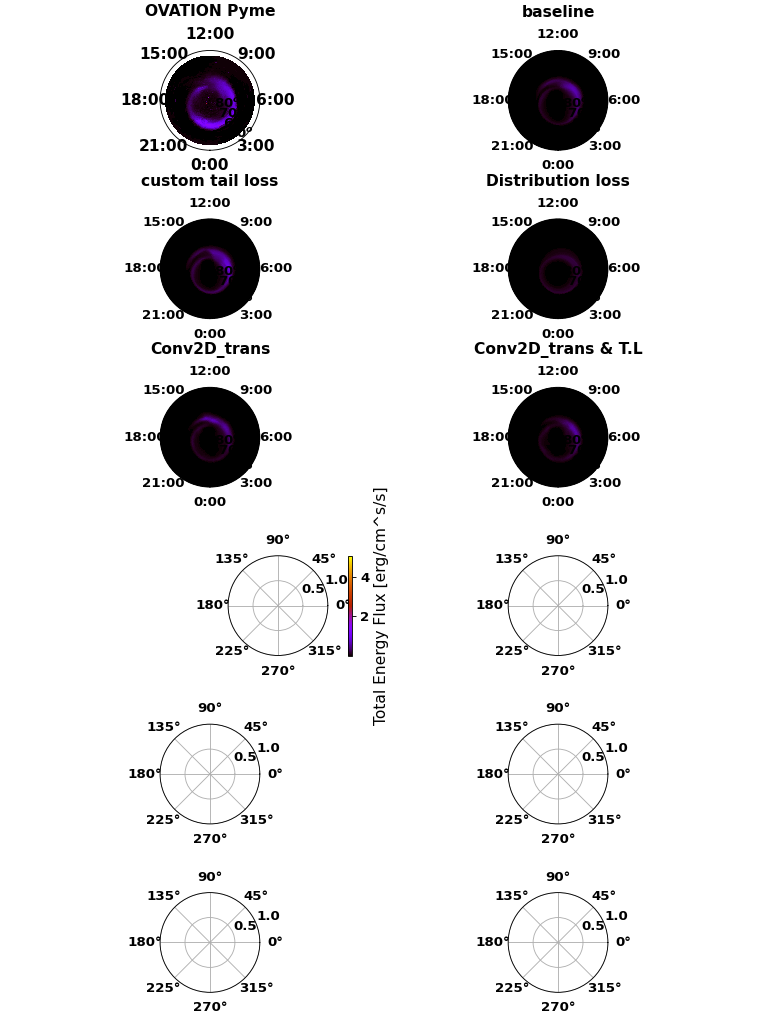

baseline


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


custom tail loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Distribution loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-

Conv2D_trans
Conv2D_trans & T.L
Correction Applied
Correction Applied
Correction Applied
2010-03-18 08:54:40


<IPython.core.display.Javascript object>


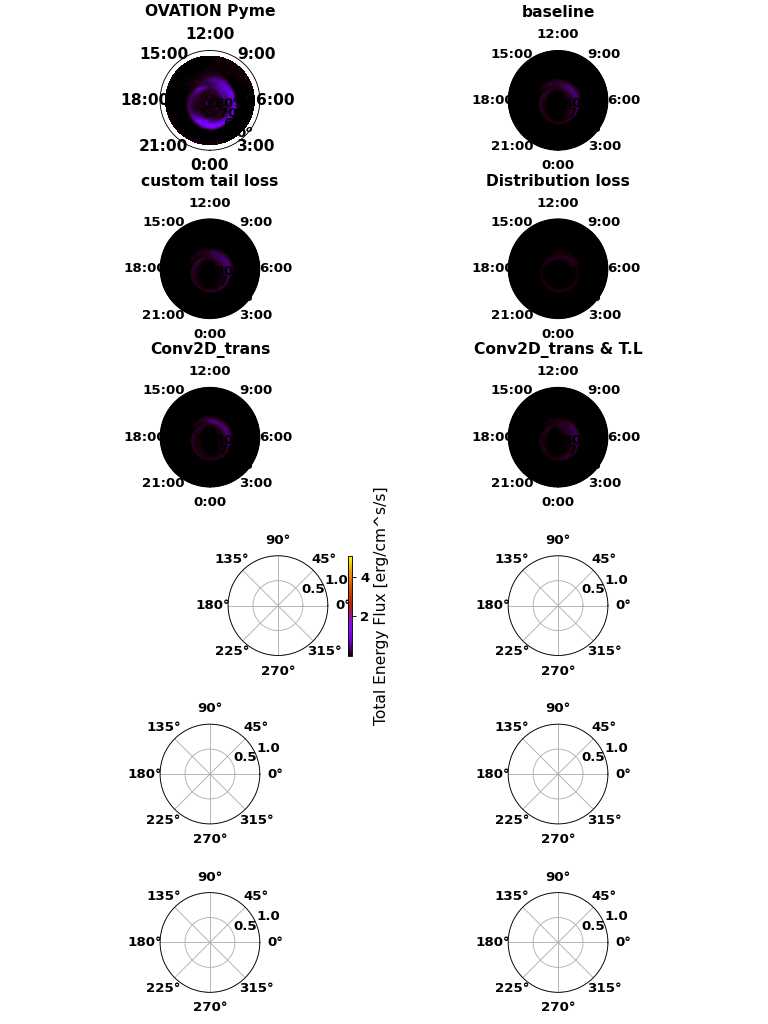

baseline


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


custom tail loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Distribution loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-

Conv2D_trans
Conv2D_trans & T.L
Correction Applied
Correction Applied
Correction Applied
2010-03-18 11:25:00


<IPython.core.display.Javascript object>


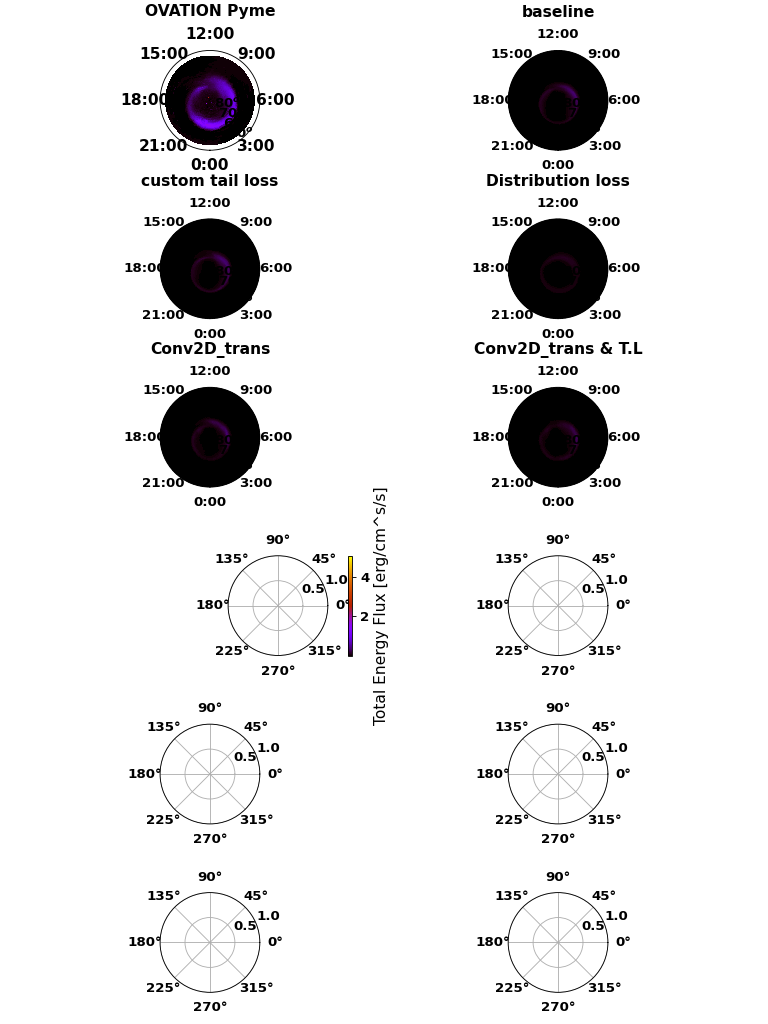

baseline


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


custom tail loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Distribution loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-

Conv2D_trans
Conv2D_trans & T.L
Correction Applied
Correction Applied
Correction Applied
2010-03-18 13:23:50


<IPython.core.display.Javascript object>


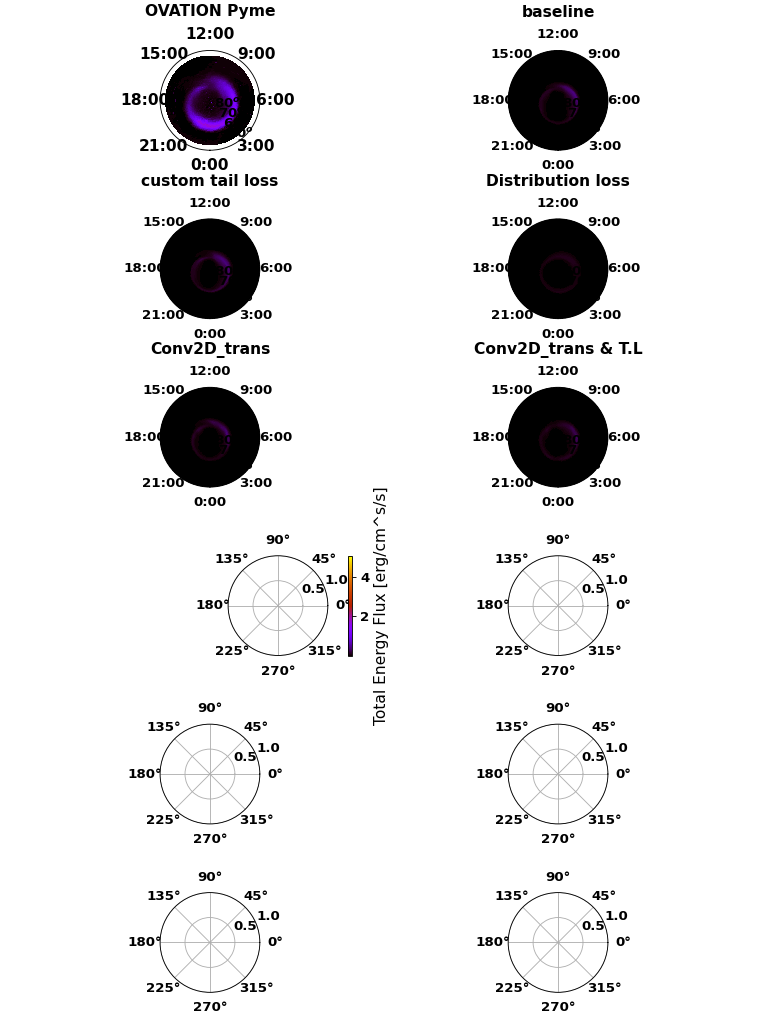

baseline


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


custom tail loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Distribution loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-

Conv2D_trans
Conv2D_trans & T.L
Correction Applied
Correction Applied
Correction Applied
2010-03-18 15:48:46


<IPython.core.display.Javascript object>


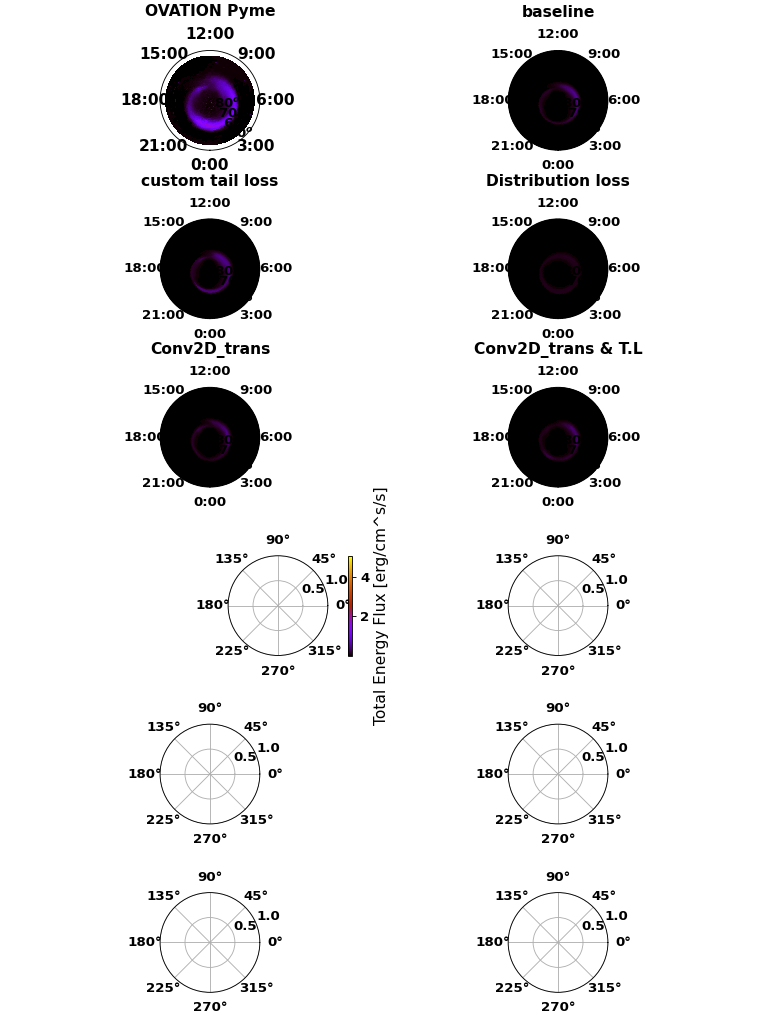

baseline


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


custom tail loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Distribution loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-

Conv2D_trans
Conv2D_trans & T.L
Correction Applied
Correction Applied
Correction Applied
2010-03-18 18:24:53


<IPython.core.display.Javascript object>


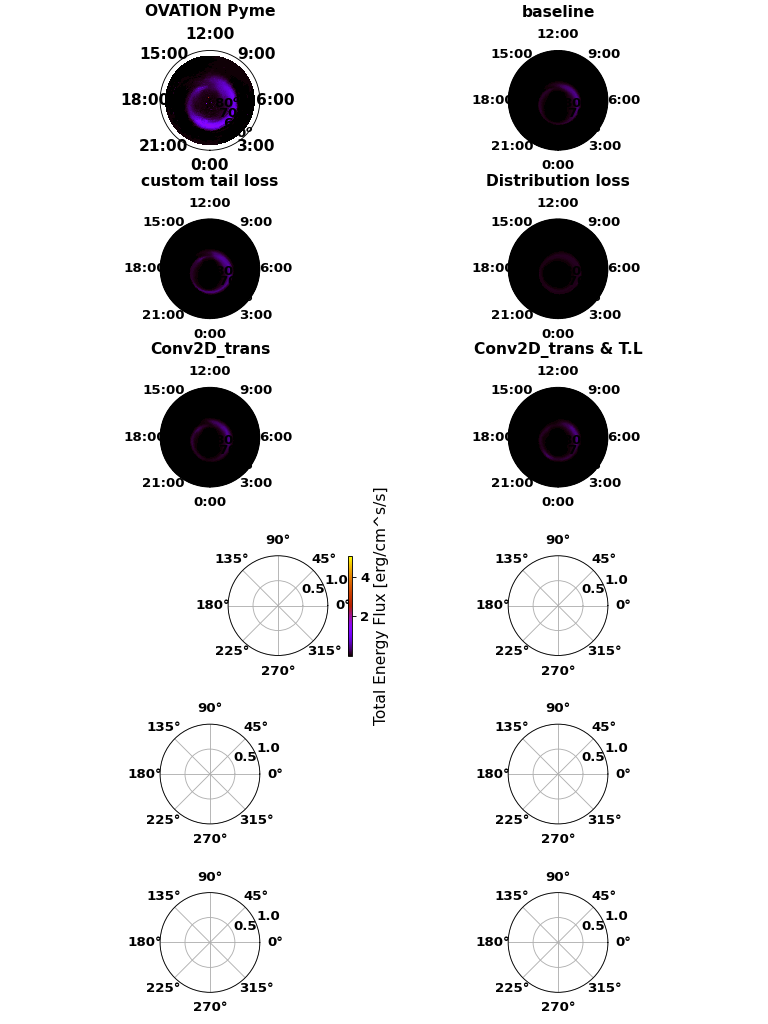

baseline


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


custom tail loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Distribution loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-

Conv2D_trans
Conv2D_trans & T.L
Correction Applied
Correction Applied
Correction Applied
2010-03-18 20:52:23


<IPython.core.display.Javascript object>


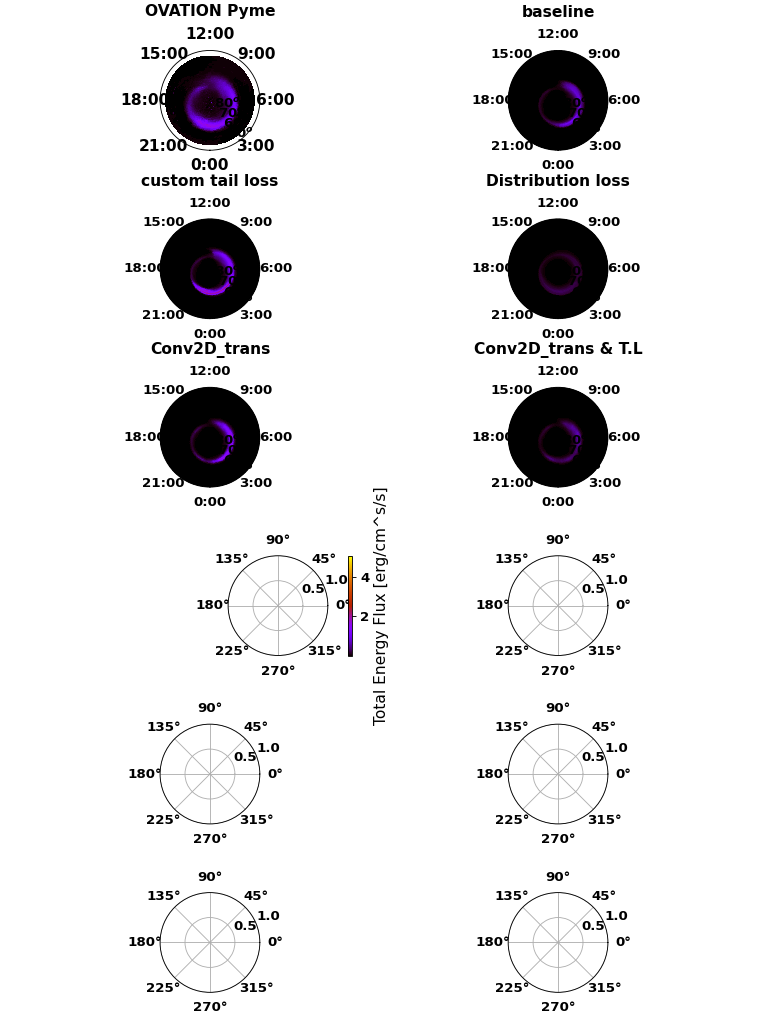

baseline


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


custom tail loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Distribution loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-

Conv2D_trans
Conv2D_trans & T.L
Correction Applied
Correction Applied
Correction Applied
2010-03-18 23:29:47


<IPython.core.display.Javascript object>


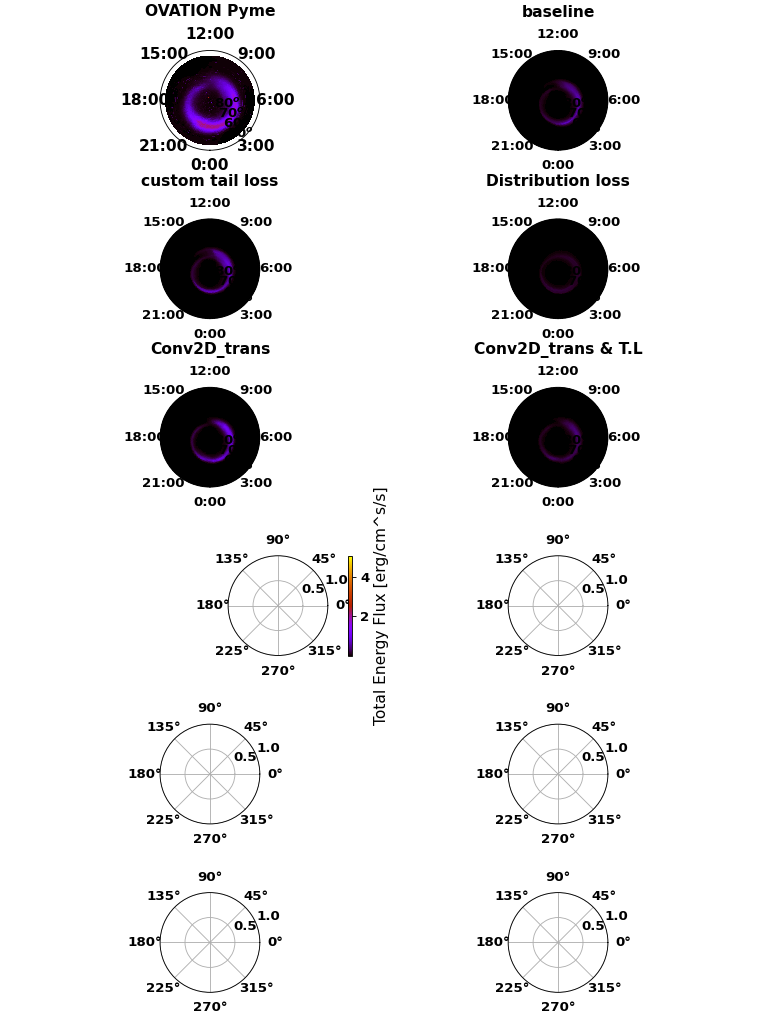

baseline


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


custom tail loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Distribution loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-

Conv2D_trans
Conv2D_trans & T.L
Correction Applied
Correction Applied
Correction Applied


In [13]:
plot_model_multiple_polar_no_log_scale(models,model_names, scalars, model_input_keys, dims, model_pipeline,df_val[60*30:(df_val.shape[0]):60*60])


0 2010-03-18 00:30:00
2010-03-18 00:30:00


<IPython.core.display.Javascript object>


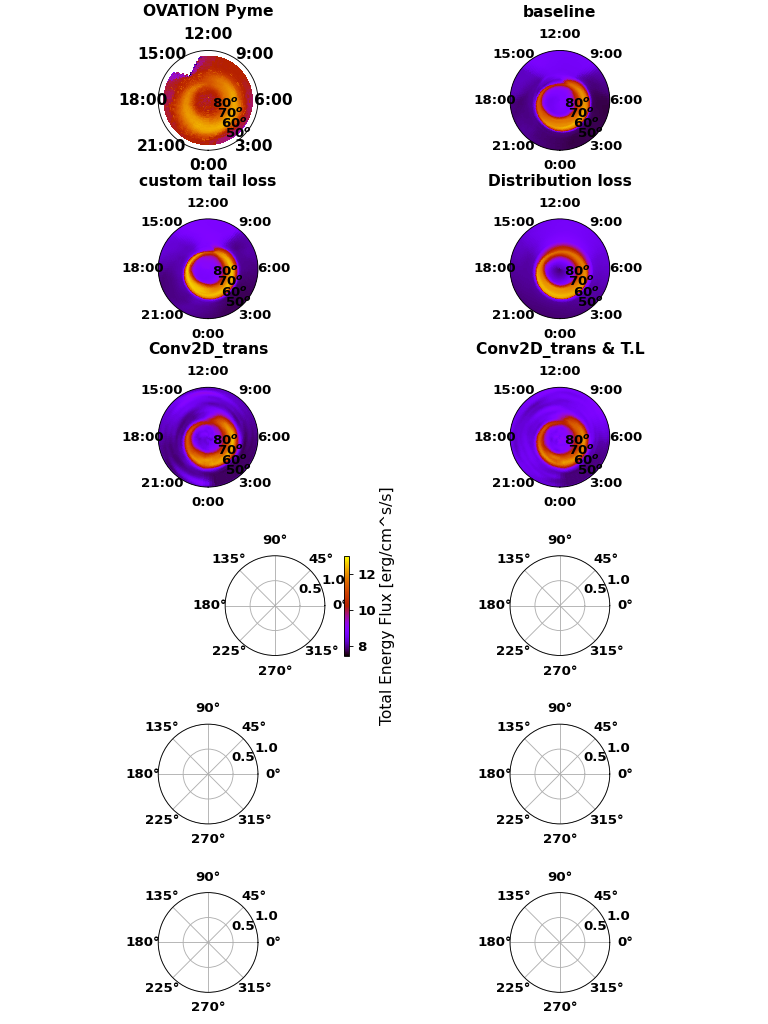

baseline


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


custom tail loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Distribution loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-

Conv2D_trans
Conv2D_trans & T.L
Correction Applied
Correction Applied
Correction Applied


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:175: RuntimeWarning: divide by zero encountered in log10


1 2010-03-18 01:16:37
2010-03-18 01:16:37


<IPython.core.display.Javascript object>


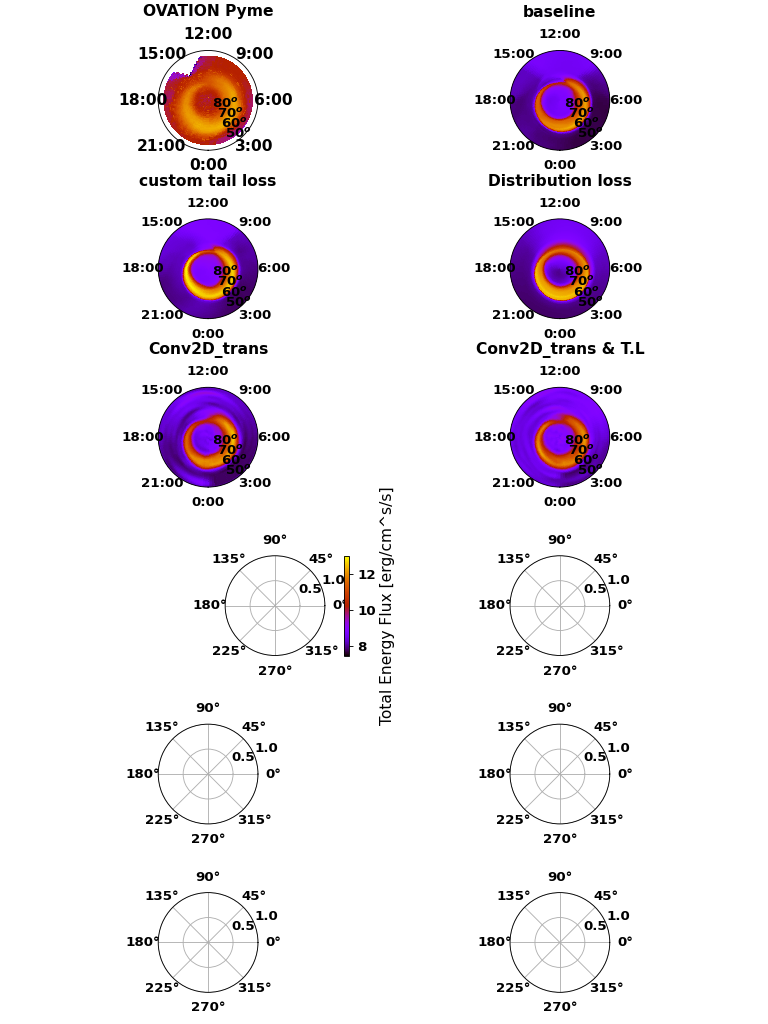

baseline


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


custom tail loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Distribution loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-

Conv2D_trans
Conv2D_trans & T.L
Correction Applied
Correction Applied
Correction Applied


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:175: RuntimeWarning: divide by zero encountered in log10


2 2010-03-18 01:32:20
2010-03-18 01:32:20


<IPython.core.display.Javascript object>


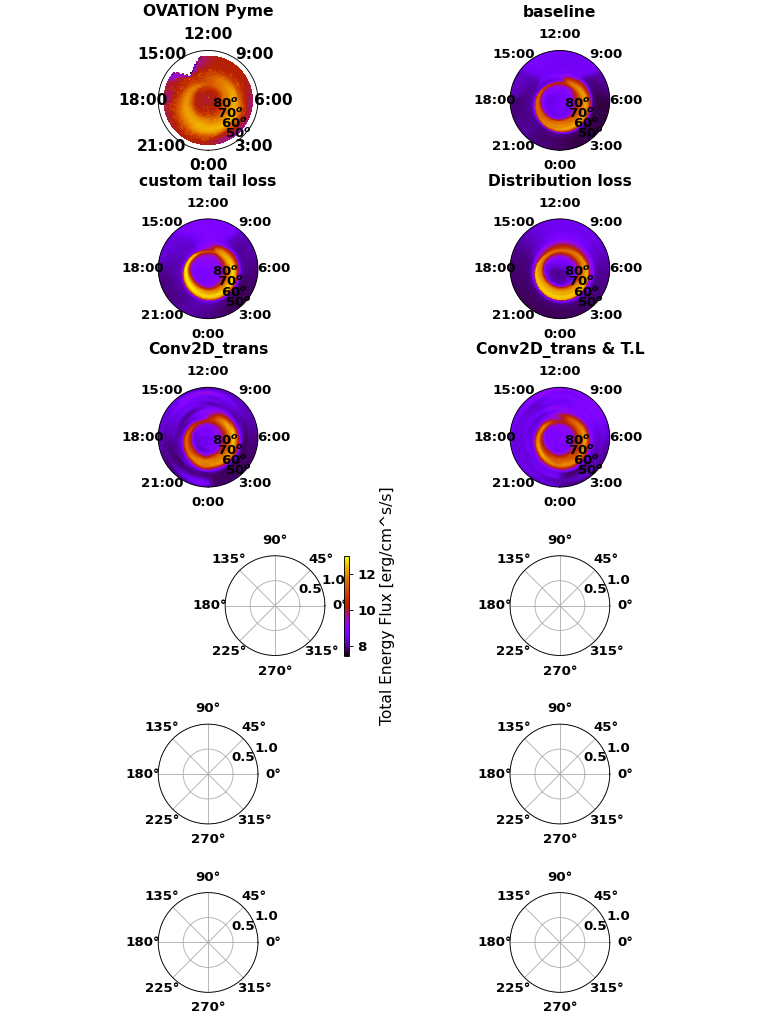

baseline


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


custom tail loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Distribution loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-

Conv2D_trans
Conv2D_trans & T.L
Correction Applied
Correction Applied
Correction Applied


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:175: RuntimeWarning: divide by zero encountered in log10


3 2010-03-18 02:11:26
2010-03-18 02:11:26


<IPython.core.display.Javascript object>


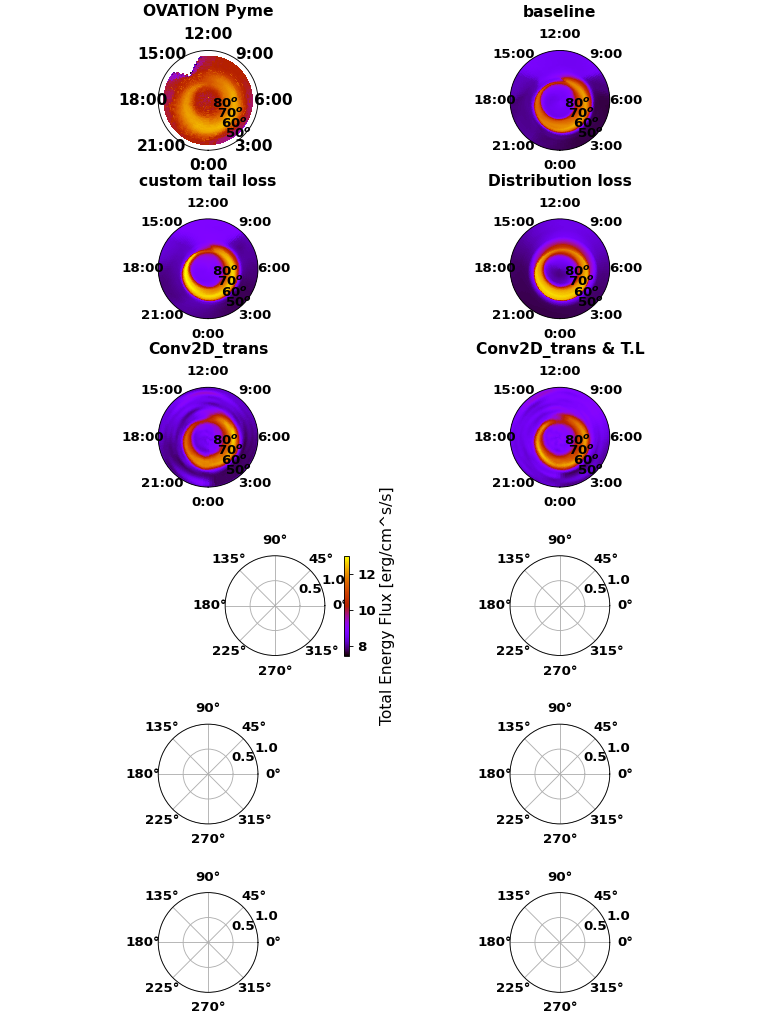

baseline


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


custom tail loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Distribution loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-

Conv2D_trans
Conv2D_trans & T.L
Correction Applied
Correction Applied
Correction Applied


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:175: RuntimeWarning: divide by zero encountered in log10


4 2010-03-18 02:57:22
2010-03-18 02:57:22


<IPython.core.display.Javascript object>


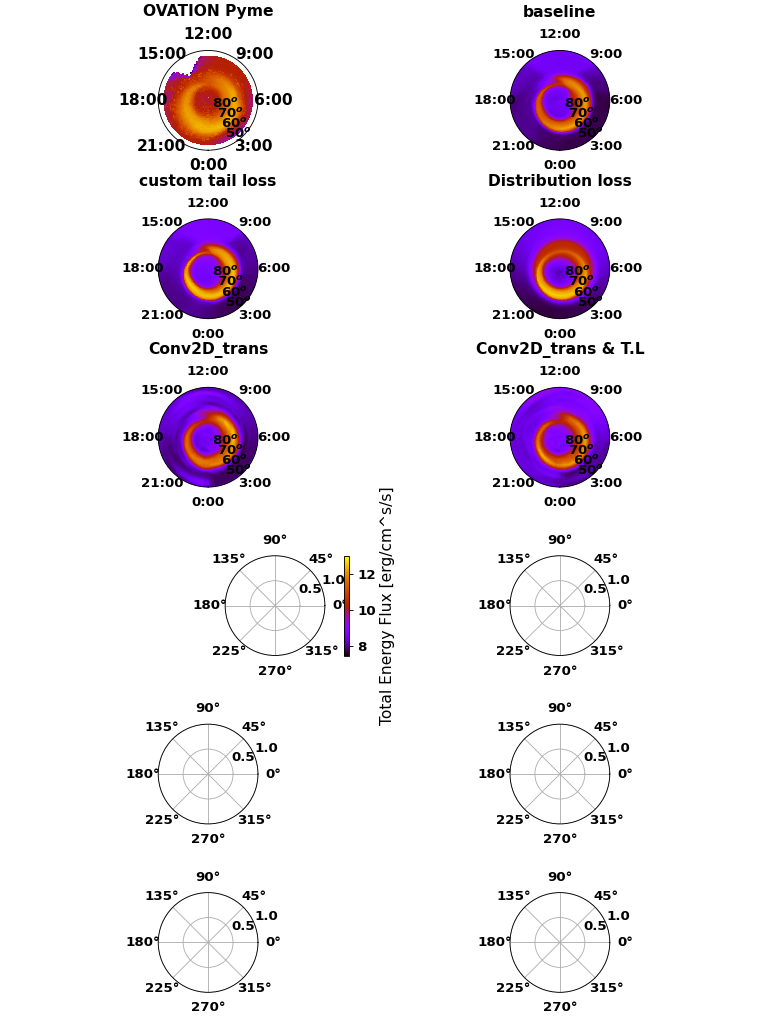

baseline


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


custom tail loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)


Distribution loss


/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-packages/ovationpyme-0.1.0-py3.6.egg/ovationpyme/ovation_plotting.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolormesh(thetagrid,rgrid,fluxgrid,**pcolor_kwargs)
/usr/local/lib/python3.6/dist-

Conv2D_trans
Conv2D_trans & T.L
Correction Applied
Correction Applied
Correction Applied


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:175: RuntimeWarning: divide by zero encountered in log10


In [14]:
#ploting every minute below
plot_model_multiple_polar(models,model_names, scalars, model_input_keys, dims, model_pipeline,df_val[0:int(df_val.shape[0]/8):60*15])


In [15]:
model_names

['baseline',
 'custom tail loss',
 'Distribution loss',
 'Conv2D_trans',
 'Conv2D_trans & T.L']

<IPython.core.display.Javascript object>


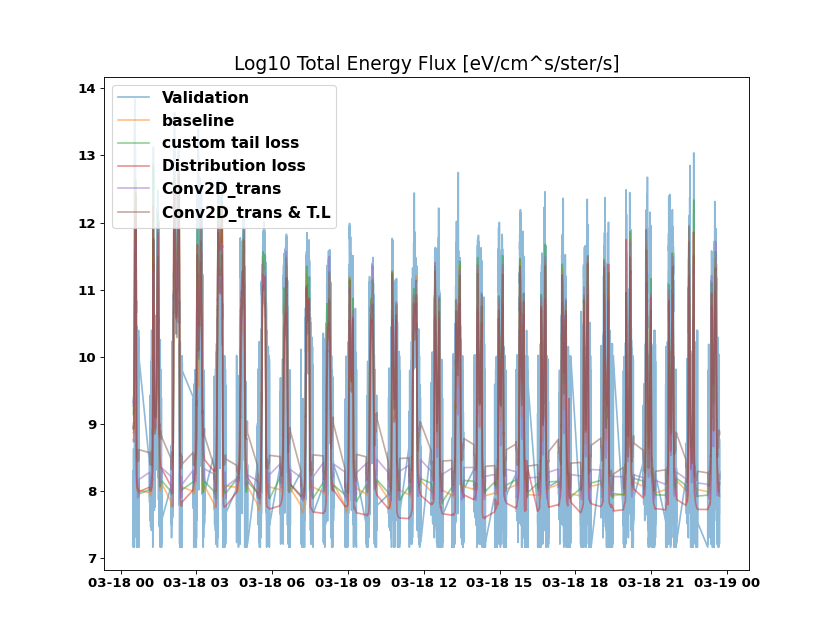

<IPython.core.display.Javascript object>


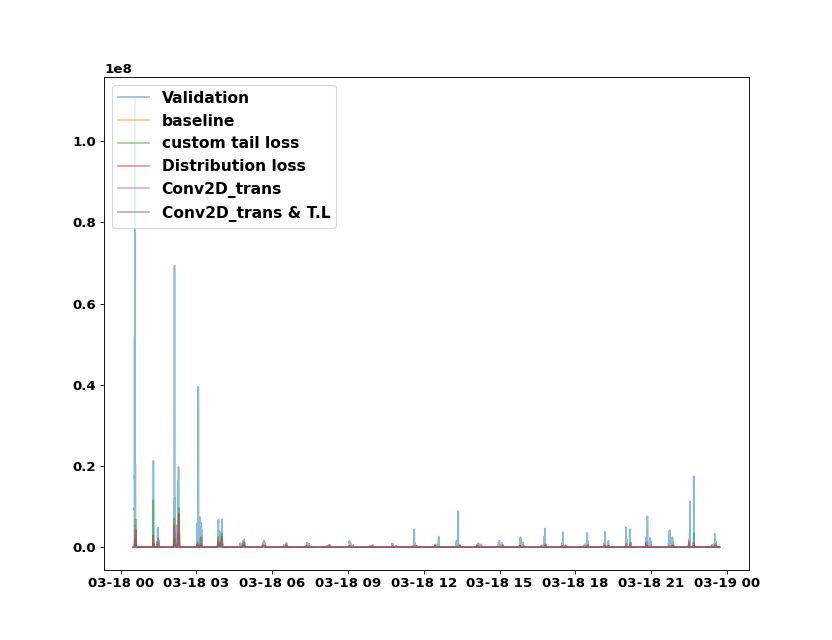

<IPython.core.display.Javascript object>


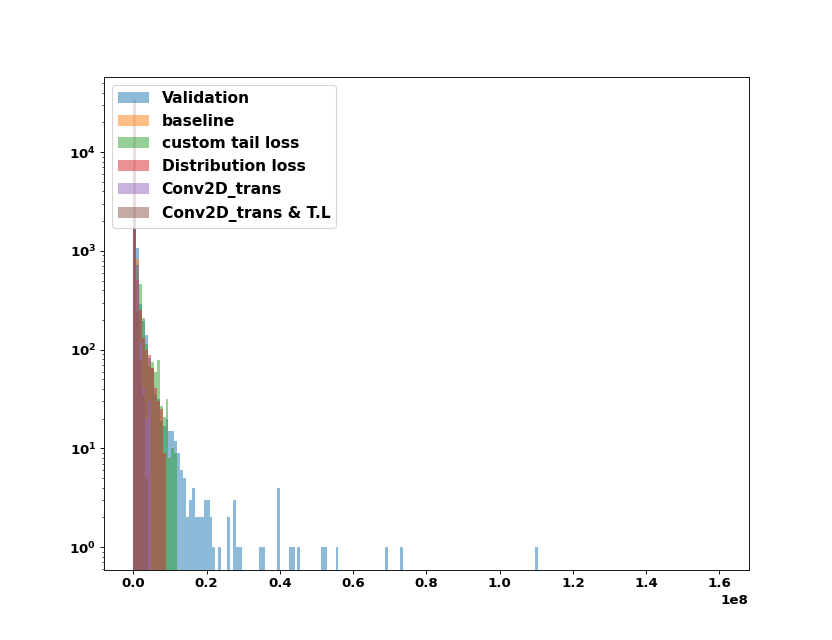

<IPython.core.display.Javascript object>


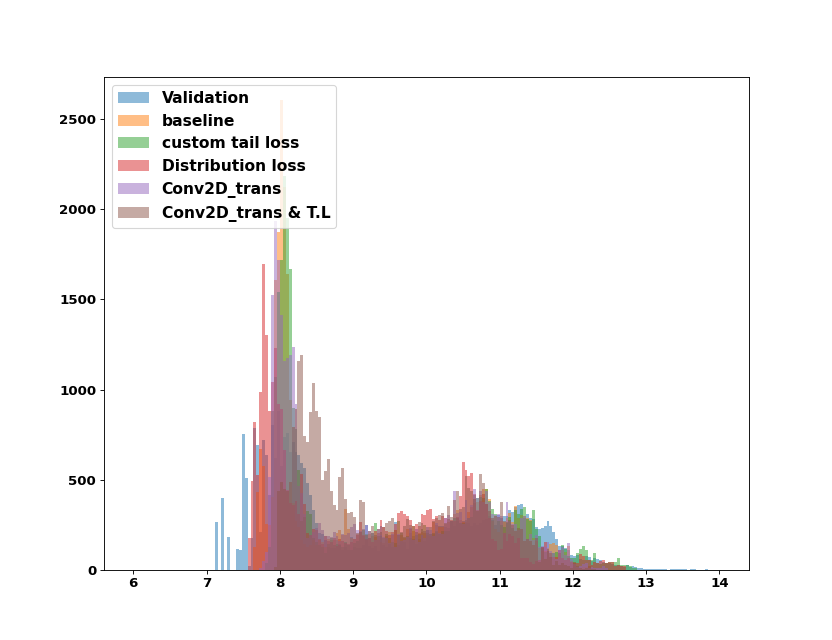

<IPython.core.display.Javascript object>


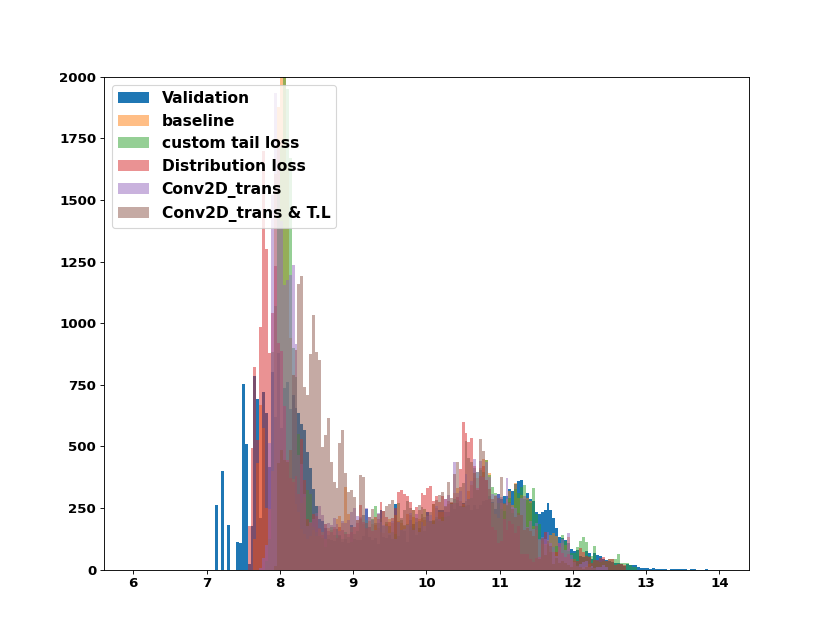

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


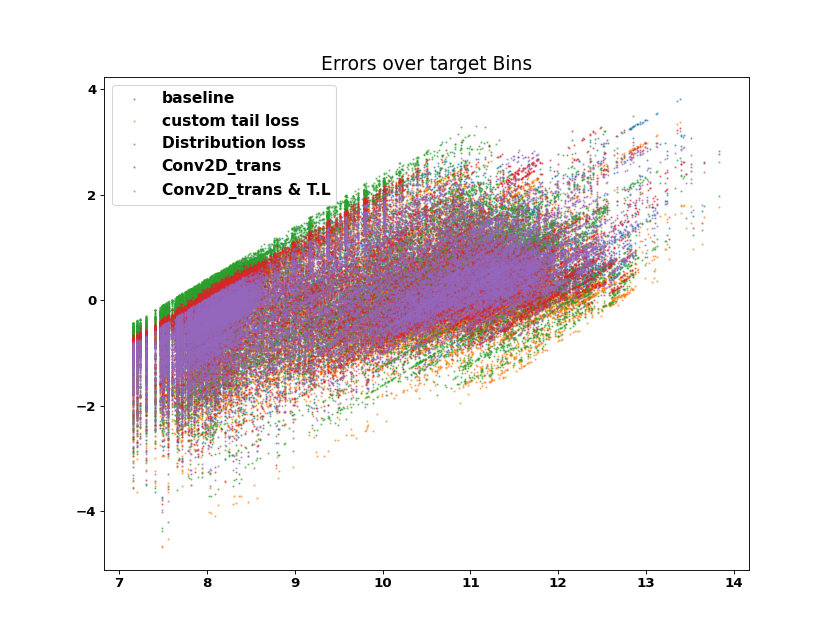

<IPython.core.display.Javascript object>


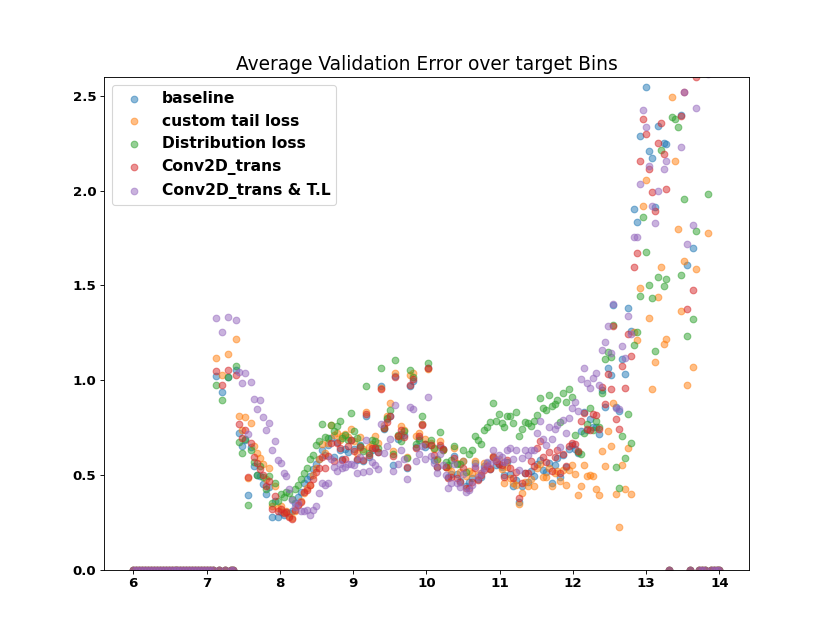

<IPython.core.display.Javascript object>


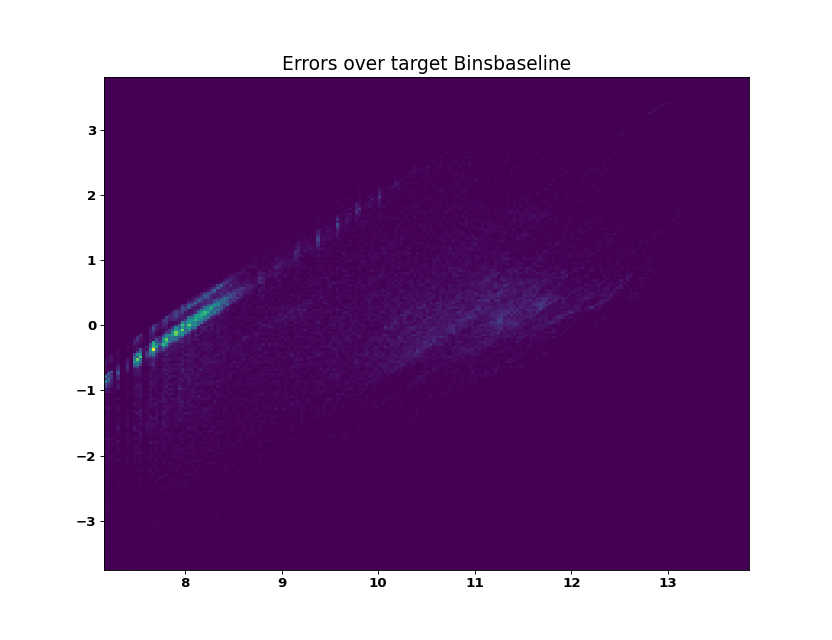

<IPython.core.display.Javascript object>


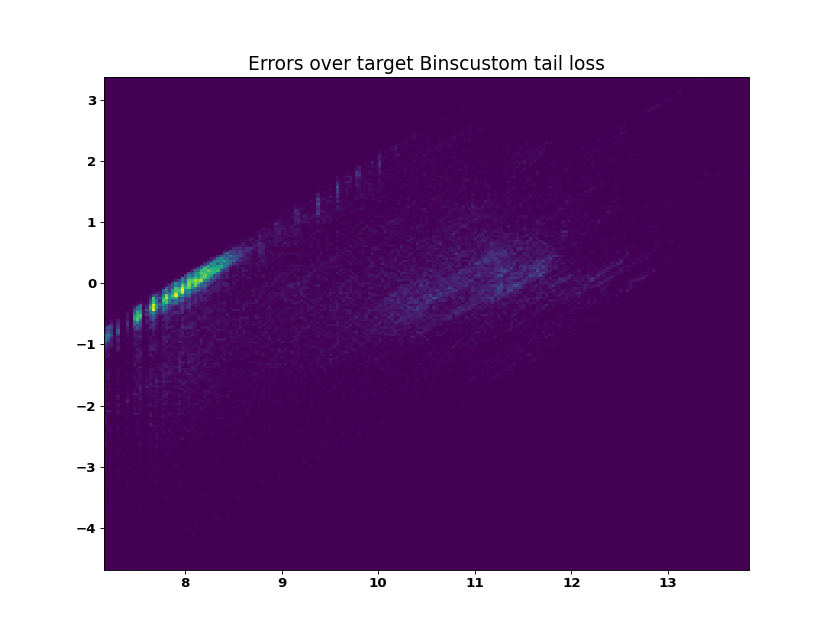

<IPython.core.display.Javascript object>


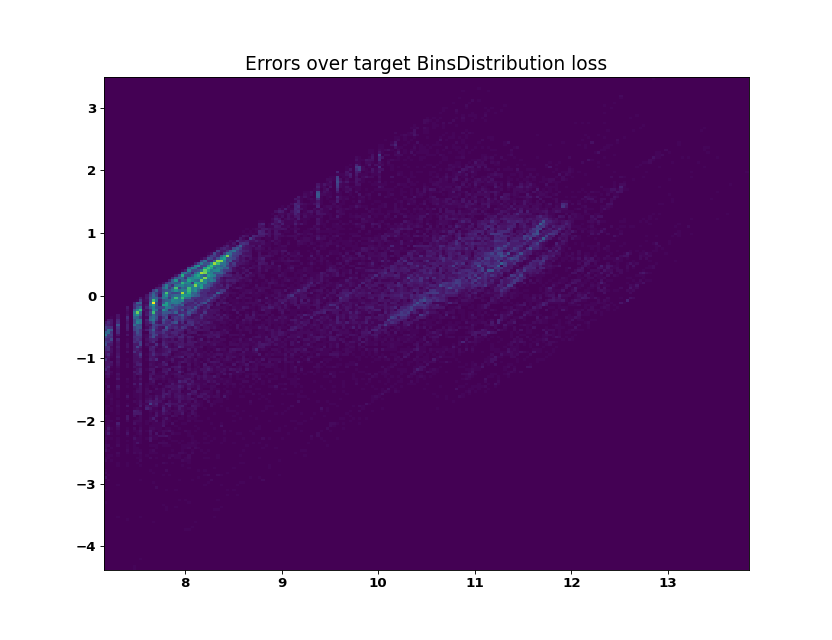

<IPython.core.display.Javascript object>


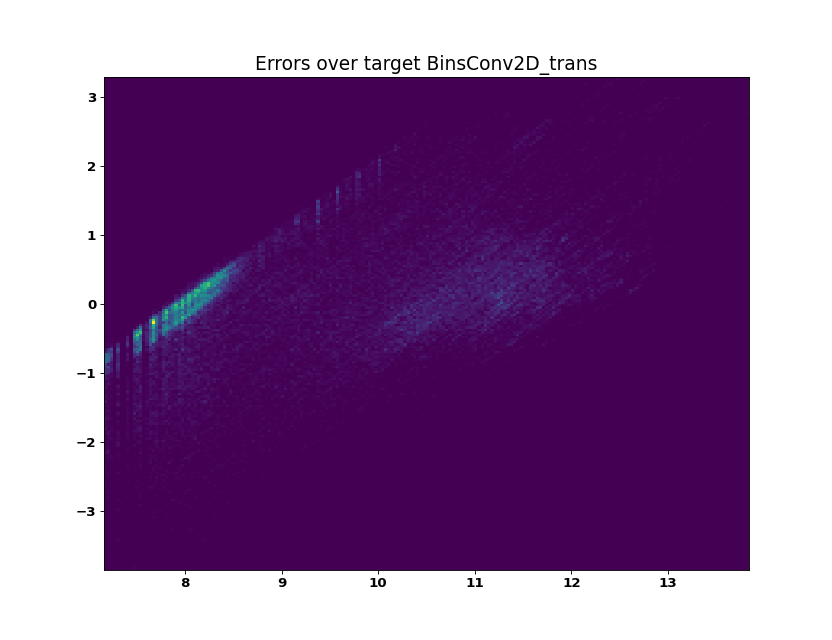

<IPython.core.display.Javascript object>


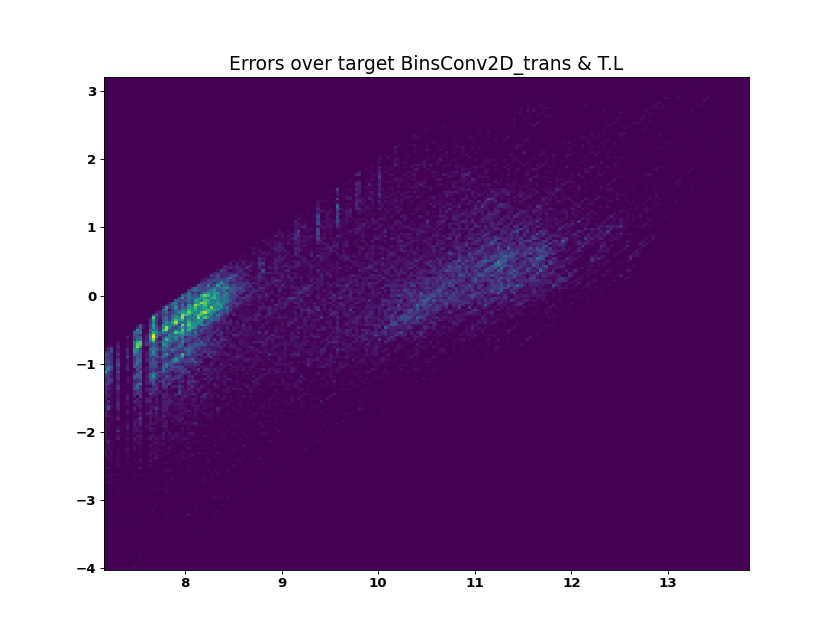

<IPython.core.display.Javascript object>


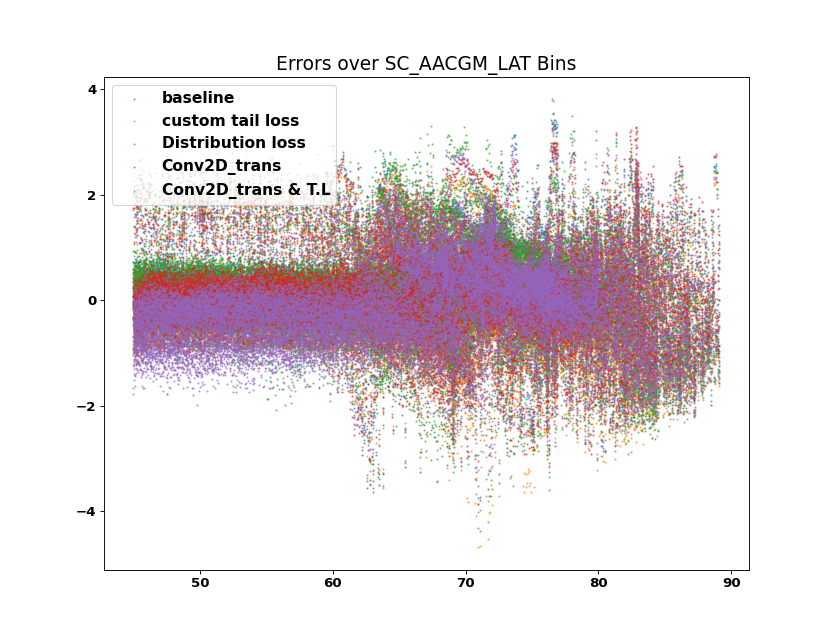

<IPython.core.display.Javascript object>


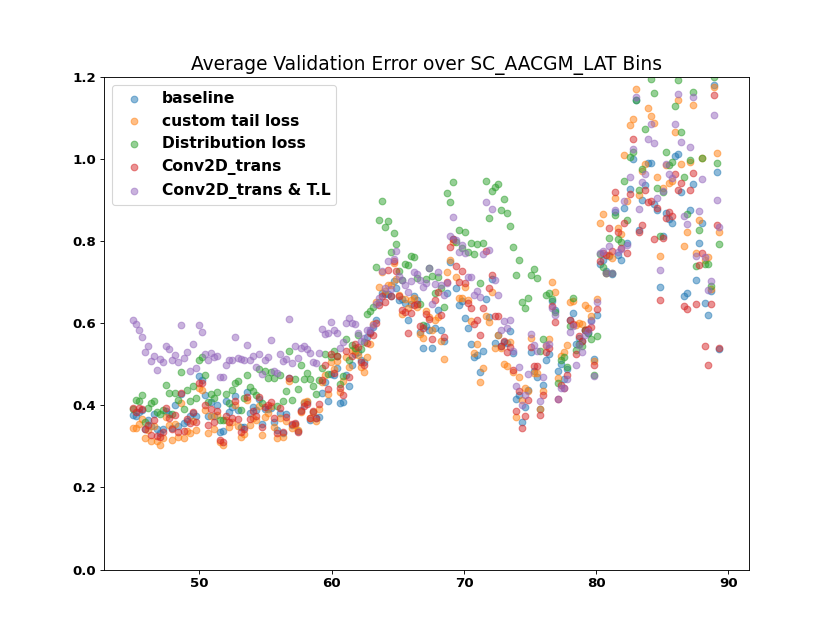

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in true_divide


In [16]:
plot_model_multiple(All_results,model_names,y_val_log)

